In [1]:
import os
os.getcwd()

'C:\\Users\\tomal\\OneDrive\\Bureau\\Cours M1\\2st_semester\\PACED\\Projet'

In [2]:
# Initialize all the parameters
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [4]:
# Prepare all the dataframes

dfChemicals = pd.read_csv(r'Dataset/chemicals.csv', index_col=0, delimiter='|')
dfConc_time_values = pd.read_csv(r'Dataset/conc_time_values.csv', index_col=0, delimiter='|')
dfDocuments = pd.read_csv(r'Dataset/documents.csv', index_col=0, delimiter='|')
dfSeries = pd.read_csv(r'Dataset/series.csv', index_col=0, delimiter='|')
dfStudies = pd.read_csv(r'Dataset/studies.csv', index_col=0, delimiter='|')
dfSubjects = pd.read_csv(r'Dataset/subjects.csv', index_col=0, delimiter='|')
dfTK_parameters = pd.read_csv(r'Dataset/tk_parameters.csv', index_col=0, delimiter='|')

# Let's have a look at each df and drop columns that are not important/change types of some column

In [5]:
#Manipulating the Chemicals dataframe

In [6]:
dfChemicals

,dsstox_substance_id,dsstox_casrn,preferred_name,chemistry_team_mapping
id,,,,
1,DTXSID3061635,1229-55-6,NaN,1
2,DTXSID6044519,116-66-5,NaN,1
3,DTXSID7031290,54464-57-2,NaN,1
4,DTXSID7020687,608-73-1,NaN,1
5,DTXSID1021116,62-44-2,NaN,1
...,...,...,...,...
292,DTXSID10169854,174592-47-3,NaN,1
294,DTXSID3037094,68392-35-8,NaN,1
295,DTXSID20230862,81024-43-3,NaN,1


In [7]:
dfDocuments

,pmid,doi,first_author,year,title,other_study_identifier,url,extracted,tentatively_identified_test_substance,machine_confidence,tsca,fifra,toxcast
id,,,,,,,,,,,,,
1,43370.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
2,422270.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
3,422271.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
4,538758.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
5,629888.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24779,31009098.0,NaN,NaN,NaN,NaN,NaN,NaN,0,['Polystyrene'],0.888889,1.0,NaN,NaN
24780,31009125.0,NaN,NaN,NaN,NaN,NaN,NaN,0,"['2-Acetylaminofluorene', 'Pantoprazole']",1.000000,1.0,NaN,NaN
24781,31009603.0,NaN,NaN,NaN,NaN,NaN,NaN,0,['Corticosterone'],1.000000,NaN,NaN,NaN


In [8]:
#id of columns that we want in a dict:
dict_columns={'Dsstox_substance':dfChemicals['dsstox_substance_id'],'Dsstox_CASrn':dfChemicals['dsstox_casrn']}

#Create a new df based on the Chemical one
df_ChemicalsID=pd.DataFrame(data=dict_columns, index=dfChemicals.index)
df_ChemicalsID

,Dsstox_substance,Dsstox_CASrn
id,,
1,DTXSID3061635,1229-55-6
2,DTXSID6044519,116-66-5
3,DTXSID7031290,54464-57-2
4,DTXSID7020687,608-73-1
5,DTXSID1021116,62-44-2
...,...,...
292,DTXSID10169854,174592-47-3
294,DTXSID3037094,68392-35-8
295,DTXSID20230862,81024-43-3


In [9]:
#Manipulating the Conc_time_values dataframe

In [10]:
dfConc_time_values

,fk_series_id,time_original,conc_original,conc_sd_original,conc_lower_bound_original,conc_upper_bound_original,no_conc_val_type,time_hr,conc,conc_sd,conc_lower_bound,conc_upper_bound
id,,,,,,,,,,,,
1,1.0,0.069826,2.618893,NaN,NaN,NaN,NaN,0.06982,0.00261,NaN,NaN,NaN
2,1.0,0.239928,122.156713,NaN,NaN,NaN,NaN,0.23992,0.12215,NaN,NaN,NaN
3,1.0,0.407653,340.571116,47.781570,NaN,NaN,NaN,0.40765,0.34057,NaN,NaN,NaN
4,1.0,0.766816,990.431853,76.792296,NaN,NaN,NaN,0.76681,0.99043,NaN,NaN,NaN
5,1.0,1.066636,510.409394,54.607509,NaN,NaN,NaN,1.06663,0.51040,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
123077,32410.0,2.232525,2.160360,NaN,NaN,NaN,NaN,2.23252,2.16035,NaN,NaN,NaN
123078,32411.0,0.000000,2.298093,NaN,NaN,NaN,NaN,0.00000,2.29809,NaN,NaN,NaN
123079,32411.0,0.668434,1.931652,NaN,NaN,NaN,NaN,0.66843,1.93165,NaN,NaN,NaN


In [11]:
dfConc_time_values.dtypes

fk_series_id                 float64
time_original                float64
conc_original                float64
conc_sd_original             float64
conc_lower_bound_original    float64
conc_upper_bound_original    float64
no_conc_val_type              object
time_hr                      float64
conc                         float64
conc_sd                      float64
conc_lower_bound             float64
conc_upper_bound             float64
dtype: object

In [12]:
#Change type of 'fk_series_id' but must check first for NaN values
dfConc_time_values['fk_series_id'].isna().sum()

18

In [13]:
#Drop the NaN elements
dfConc_time_values.dropna(subset=['fk_series_id'], inplace=True)

In [14]:
#Confirm that there is no more NaN values in the column 'fk_series_id'
dfConc_time_values['fk_series_id'].isna().sum()


0

In [15]:
#Convert the 'Series_ID' of Conc_time elements in integrer 
dfConc_time_values['fk_series_id']=[int(k) for k in dfConc_time_values['fk_series_id']]
dfConc_time_values.dtypes

fk_series_id                   int64
time_original                float64
conc_original                float64
conc_sd_original             float64
conc_lower_bound_original    float64
conc_upper_bound_original    float64
no_conc_val_type              object
time_hr                      float64
conc                         float64
conc_sd                      float64
conc_lower_bound             float64
conc_upper_bound             float64
dtype: object

In [16]:
(dfConc_time_values['time_original']<0).sum()

1405

In [17]:
(dfConc_time_values['time_hr']<0).sum()

1402

In [18]:
#The negative time correspond at the time before the concentration of the molecules is at the higher in the selected body (this is t=0)
#So negative time indiquate the concentration before the maximum concentration and the begin of the experience has been reach
#The dose-duration elements from dataframe Studies indicate the time for the compound to be eliminated from the selected individual

In [19]:
#id of columns in a dict
dict_columns={'Series_ID':dfConc_time_values['fk_series_id'],'Time':dfConc_time_values['time_original'],
              'Concentration':dfConc_time_values['conc_original']}

#Construct the new df
df_Conc_time=pd.DataFrame(data=dict_columns, index=dfConc_time_values.index)
df_Conc_time

,Series_ID,Time,Concentration
id,,,
1,1,0.069826,2.618893
2,1,0.239928,122.156713
3,1,0.407653,340.571116
4,1,0.766816,990.431853
5,1,1.066636,510.409394
...,...,...,...
123077,32410,2.232525,2.160360
123078,32411,0.000000,2.298093
123079,32411,0.668434,1.931652


In [20]:
df_Conc_time.head(n=20)

,Series_ID,Time,Concentration
id,,,
1,1,0.069826,2.618893
2,1,0.239928,122.156713
3,1,0.407653,340.571116
4,1,0.766816,990.431853
5,1,1.066636,510.409394
6,1,1.605650,273.964524
7,1,2.084566,139.097190
8,1,2.561408,90.522146
9,1,3.614721,46.398302


In [21]:
#Manipulating the Documents dataframe

In [22]:
dfDocuments

,pmid,doi,first_author,year,title,other_study_identifier,url,extracted,tentatively_identified_test_substance,machine_confidence,tsca,fifra,toxcast
id,,,,,,,,,,,,,
1,43370.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
2,422270.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
3,422271.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
4,538758.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
5,629888.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24779,31009098.0,NaN,NaN,NaN,NaN,NaN,NaN,0,['Polystyrene'],0.888889,1.0,NaN,NaN
24780,31009125.0,NaN,NaN,NaN,NaN,NaN,NaN,0,"['2-Acetylaminofluorene', 'Pantoprazole']",1.000000,1.0,NaN,NaN
24781,31009603.0,NaN,NaN,NaN,NaN,NaN,NaN,0,['Corticosterone'],1.000000,NaN,NaN,NaN


In [23]:
dfDocuments.dtypes

pmid                                     float64
doi                                       object
first_author                              object
year                                     float64
title                                    float64
other_study_identifier                    object
url                                       object
extracted                                  int64
tentatively_identified_test_substance     object
machine_confidence                       float64
tsca                                     float64
fifra                                    float64
toxcast                                  float64
dtype: object

In [24]:
#Drop the NaN elements
dfDocuments['pmid'].dropna()

id
1           43370.0
2          422270.0
3          422271.0
4          538758.0
5          629888.0
            ...    
24779    31009098.0
24780    31009125.0
24781    31009603.0
24782    31009866.0
24783    31009926.0
Name: pmid, Length: 24645, dtype: float64

In [25]:
dfDocuments['pmid'].isna().sum()

57

In [26]:
#Drop NaN values before trying to convert the type
dfDocuments.dropna(subset=['pmid'], inplace=True)
dfDocuments['pmid'].isna().sum()

0

In [27]:
#Convert the 'pmid' of Documents into integrer 
dfDocuments['pmid']=[int(k) for k in dfDocuments['pmid']]
dfDocuments.dtypes

pmid                                       int64
doi                                       object
first_author                              object
year                                     float64
title                                    float64
other_study_identifier                    object
url                                       object
extracted                                  int64
tentatively_identified_test_substance     object
machine_confidence                       float64
tsca                                     float64
fifra                                    float64
toxcast                                  float64
dtype: object

In [28]:
#We only keep the column 'pmid'
df_Documents=pd.DataFrame(data={'Pmid':dfDocuments['pmid']}, index=dfDocuments.index)
df_Documents

,Pmid
id,
1,43370
2,422270
3,422271
4,538758
5,629888
...,...
24779,31009098
24780,31009125
24781,31009603


In [29]:
#Manipulating the Series dataframe

In [30]:
dfSeries

,analyte_name_original,fk_analyzed_chemical_id,figure_name,figure_series_identifier,author_comment,time_units_original,conc_units_original,conc_units_normalized,log_concentration_values,loq,...,conc_medium_original,conc_medium_normalized,curator_comment,fk_study_id,radiolabeled,analyte_dtxsid,analyte_casrn,test_substance_dtxsid,test_substance_casrn,fk_test_chemical_id
id,,,,,,,,,,,,,,,,,,,,,
1,Solvent red1,1.0,Figure 5B,NaN,mean values,hr,ug/L,NaN,NaN,1.0,...,blood,blood,NaN,1157,NaN,DTXSID3061635,1229-55-6,DTXSID3061635,1229-55-6,1
2,musk moskene,2.0,Fig. 2,triangle,"30 embryos in 2 petri dishes, multiple data po...",days,ug/L,NaN,NaN,NaN,...,embryo medium,NaN,NaN,1158,NaN,DTXSID6044519,116-66-5,DTXSID6044519,116-66-5,2
3,[14]C,256.0,Table 2.,NaN,NaN,hr,ng/g tissue,NaN,NaN,NaN,...,blood,blood,NaN,1159,NaN,DTXSID20873970,14762-75-5,DTXSID7031290,54464-57-2,3
4,[14]C,256.0,Table 2.,NaN,NaN,hr,ng/g tissue,NaN,NaN,NaN,...,adipose,adipose,NaN,1159,NaN,DTXSID20873970,14762-75-5,DTXSID7031290,54464-57-2,3
5,[14]C,256.0,Table 2.,NaN,NaN,hr,ng/g tissue,NaN,NaN,NaN,...,muscle,muscle,NaN,1159,NaN,DTXSID20873970,14762-75-5,DTXSID7031290,54464-57-2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,Emodin,65.0,NaN,10,NaN,minute,ug/mL,NaN,0.0,0.1,...,plasma,plasma,NaN,1841,NaN,DTXSID5025231,518-82-1,DTXSID5025231,518-82-1,65
32408,Emodin,65.0,NaN,11,NaN,minute,ug/mL,NaN,0.0,0.1,...,plasma,plasma,NaN,1841,NaN,DTXSID5025231,518-82-1,DTXSID5025231,518-82-1,65
32409,Emodin,65.0,NaN,12,NaN,minute,ug/mL,NaN,0.0,0.1,...,plasma,plasma,NaN,1841,NaN,DTXSID5025231,518-82-1,DTXSID5025231,518-82-1,65


In [31]:
# Let's look for NaN and type of elements in conc_units_normalized in the dataframe
print(dfSeries['conc_units_normalized'].isna().sum())
dfSeries['conc_units_normalized'].unique()

16576


array([nan])

In [32]:
# I cannot keep this columns when building the main dataframe with all the datas
# I will try to convert the units after hand

In [33]:
dfSeries.dtypes

analyte_name_original        object
fk_analyzed_chemical_id     float64
figure_name                  object
figure_series_identifier     object
author_comment               object
time_units_original          object
conc_units_original          object
conc_units_normalized       float64
log_concentration_values    float64
loq                         float64
loq_units                    object
analytical_method_detail     object
n_subjects_in_series        float64
fk_subject_id                 int64
conc_medium_original         object
conc_medium_normalized       object
curator_comment              object
fk_study_id                   int64
radiolabeled                float64
analyte_dtxsid               object
analyte_casrn                object
test_substance_dtxsid        object
test_substance_casrn         object
fk_test_chemical_id           int64
dtype: object

In [34]:
# We see that there is only the 'fk_analyse_chemical_id column which is no int from the id columns
# But will see that we don't keep it later on, so don't need to do some operations on it

In [35]:
#id of columns in a dict:
dict_columns={'Analyzed_Chemical_ID':dfSeries['fk_analyzed_chemical_id'],'Test_Chemical_ID':dfSeries['fk_test_chemical_id'],
              'Subjects_ID':dfSeries['fk_subject_id'],'Study_ID':dfSeries['fk_study_id'],'Analyte_dtxsid':dfSeries['analyte_dtxsid'],
              'Analyte_CASrn':dfSeries['analyte_casrn'],'Analyte_name':dfSeries['analyte_name_original'],
              'Time_units':dfSeries['time_units_original'],'Conc_units':dfSeries['conc_units_original'],
              'Conc_medium':dfSeries['conc_medium_original'],'Analytical_method':dfSeries['analytical_method_detail'],
              'Comments':dfSeries['author_comment']}

#Construct the new df
df_Series=pd.DataFrame(data=dict_columns, index=dfSeries.index)
df_Series.sort_values(by=['Subjects_ID'], inplace=True)
df_Series

,Analyzed_Chemical_ID,Test_Chemical_ID,Subjects_ID,Study_ID,Analyte_dtxsid,Analyte_CASrn,Analyte_name,Time_units,Conc_units,Conc_medium,Analytical_method,Comments
id,,,,,,,,,,,,
1,1.0,1,1,1157,DTXSID3061635,1229-55-6,Solvent red1,hr,ug/L,blood,NaN,mean values
23614,140.0,140,1,49,DTXSID3020203,106-99-0,"1,3-butadiene",min,uM,blood,NaN,NaN
23615,140.0,140,1,50,DTXSID3020203,106-99-0,"1,3-butadiene",min,uM,blood,NaN,NaN
23613,140.0,140,1,48,DTXSID3020203,106-99-0,"1,3-butadiene",min,uM,blood,NaN,NaN
2,2.0,2,2,1158,DTXSID6044519,116-66-5,musk moskene,days,ug/L,embryo medium,NaN,"30 embryos in 2 petri dishes, multiple data po..."
...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.0,5,41250,1173,DTXSID1021116,62-44-2,phenacetin,min,ug/mL,blood,NaN,1 subject of 6; value at 240 min below the LOQ...
101,5.0,5,41250,1175,DTXSID1021116,62-44-2,phenacetin,min,ug/mL,blood,NaN,"1 subject of 6; 26 yo, 59 kg; below LOQ at all..."
721,266.0,11,41251,1378,DTXSID1021950,NaN,trichloroethanol,hr,ug/mL,blood,NaN,"exact daily doses: 135.6, 101.0, 104.1, 102.0,..."


In [36]:
#Manipulating the Studies dataframe

In [37]:
dfStudies

,fk_reference_document_id,fk_extraction_document_id,fk_dosed_chemical_id,test_substance_name_original,dose_level_normalized,dose_level_original,dose_level_original_units,administration_route_original,administration_route_normalized,dose_duration,dose_frequency,dose_vehicle,dose_volume,fasting_period,curator_comment
id,,,,,,,,,,,,,,,
1,NaN,229,124,pyrene,200.0,200.0,mg/m^3,inhalation,inhalation,95 min,NaN,NaN,NaN,NaN,free pyrene concentrations available from same...
2,NaN,229,124,pyrene,500.0,500.0,mg/m^3,inhalation,inhalation,95 min,NaN,NaN,NaN,NaN,free pyrene concentrations available from same...
3,NaN,229,124,pyrene,800.0,800.0,mg/m^3,inhalation,inhalation,95 min,NaN,NaN,NaN,NaN,free pyrene concentrations available from same...
4,NaN,230,125,octane,NaN,1000.0,ppm,inhalation,inhalation,2 hr,NaN,NaN,NaN,NaN,other tissue concentrations available from sam...
5,NaN,230,125,octane,NaN,5000.0,ppm,inhalation,inhalation,2 hr,NaN,NaN,NaN,NaN,other tissue concentrations available from sam...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,NaN,175,78,2-Methyltetrahydrofuran,100.0,100.0,mg/kg,Gavage,oral,NaN,NaN,NaN,NaN,not reported,NaN
1875,NaN,175,78,2-Methyltetrahydrofuran,400.0,400.0,mg/kg,Gavage,oral,NaN,NaN,NaN,NaN,not reported,NaN
1928,NaN,129,31,2-Hydroxy-4-methoxybenzophenone,100.0,100.0,mg/kg,Gavage,oral,NaN,NaN,NaN,NaN,not reported,NaN


In [38]:
dfStudies.dtypes

fk_reference_document_id           float64
fk_extraction_document_id            int64
fk_dosed_chemical_id                 int64
test_substance_name_original        object
dose_level_normalized              float64
dose_level_original                float64
dose_level_original_units           object
administration_route_original       object
administration_route_normalized     object
dose_duration                       object
dose_frequency                      object
dose_vehicle                        object
dose_volume                         object
fasting_period                      object
curator_comment                     object
dtype: object

In [39]:
dfStudies['fk_reference_document_id'].isna().sum()

525

In [40]:
#We see that this column have only 43 elements on 572 so I decide to don't keep this one

In [41]:
#id of the columns in a dict
dict_columns={'Document_ID':dfStudies['fk_extraction_document_id'],'Chemical_ID':dfStudies['fk_dosed_chemical_id'],
              'Substance_name':dfStudies['test_substance_name_original'],'Administration_route':dfStudies['administration_route_normalized'],
              'Dose_duration':dfStudies['dose_duration'],'Dose_level':dfStudies['dose_level_normalized']}

#Construct the new df
df_Studies=pd.DataFrame(data=dict_columns, index=dfStudies.index)
df_Studies

,Document_ID,Chemical_ID,Substance_name,Administration_route,Dose_duration,Dose_level
id,,,,,,
1,229,124,pyrene,inhalation,95 min,200.0
2,229,124,pyrene,inhalation,95 min,500.0
3,229,124,pyrene,inhalation,95 min,800.0
4,230,125,octane,inhalation,2 hr,NaN
5,230,125,octane,inhalation,2 hr,NaN
...,...,...,...,...,...,...
1874,175,78,2-Methyltetrahydrofuran,oral,NaN,100.0
1875,175,78,2-Methyltetrahydrofuran,oral,NaN,400.0
1928,129,31,2-Hydroxy-4-methoxybenzophenone,oral,NaN,100.0


In [42]:
#Manipulating the Subjects dataframe

In [43]:
dfSubjects

,species,sex,age,age_category,notes,subtype,height,weight,weight_kg,weight_estimated
id,,,,,,,,,,
1,rat,NaN,NaN,NaN,"half male, half female; healthy and drug-free",Sprague Dawley,NaN,200 ± 20 g,0.20,0.0
2,frog,NaN,embyro,NaN,NaN,xenopus laevis,NaN,NaN,NaN,NaN
3,rat,male,8-12 weeks,adolescent,NaN,Fisher,NaN,400 g,0.40,0.0
4,rabbit,female,adult,adult,NaN,NaN,NaN,NaN,NaN,NaN
5,rat,male,NaN,NaN,NaN,Sprague Dawley,NaN,220 ± 20 g),0.22,0.0
...,...,...,...,...,...,...,...,...,...,...
41247,human,male,27 yr,adult,healthy,NaN,NaN,NaN,73.00,0.0
41248,human,male,27 yr,adult,healthy,NaN,NaN,NaN,87.00,0.0
41249,human,male,26 yr,adult,healthy,NaN,NaN,NaN,76.00,0.0


In [44]:
dfSubjects.dtypes

species              object
sex                  object
age                  object
age_category         object
notes                object
subtype              object
height               object
weight               object
weight_kg           float64
weight_estimated    float64
dtype: object

In [45]:
#From the preview of the dataframe, we can see that some weight values appear in weight_kg columns
#The idea would be to delete the NaN values in both columns when the 2 values are NaN
dfSubjects.dropna(subset=['weight', 'weight_kg'], how='all', inplace=True)

In [46]:
dfSubjects.head(n=30)

,species,sex,age,age_category,notes,subtype,height,weight,weight_kg,weight_estimated
id,,,,,,,,,,
1,rat,NaN,NaN,NaN,"half male, half female; healthy and drug-free",Sprague Dawley,NaN,200 ± 20 g,0.2000,0.0
3,rat,male,8-12 weeks,adolescent,NaN,Fisher,NaN,400 g,0.4000,0.0
5,rat,male,NaN,NaN,NaN,Sprague Dawley,NaN,220 ± 20 g),0.2200,0.0
6,dog,male,adult,adult,NaN,beagle,NaN,10 kg,10.0000,0.0
8,human,male,23 yr,adult,healthy,NaN,NaN,NaN,74.0000,0.0
9,rat,NaN,NaN,NaN,NaN,Wistar,NaN,170-200 g,0.1850,2.0
11,rat,male,24 d,infant,NaN,Wistar,NaN,85-120g,0.1025,2.0
12,human,male,30-45 years,adult,NaN,NaN,180-190 cm,55-90 kg,72.5000,2.0
14,rat,male,NaN,NaN,albino,Sprague Dawley,NaN,200-285 g,0.2425,2.0


In [47]:
#Also, we can checked if there is more NaN values in 'weight_kg' compare to 'weight'
print(dfSubjects['weight'].isna().sum(), dfSubjects['weight_kg'].isna().sum())

951 830


In [48]:
#id columns in a dict
dict_columns={'Species':dfSubjects['species'],'Subtype':dfSubjects['subtype'],'Sex':dfSubjects['sex'],'Age':dfSubjects['age'],
              'Age_category':dfSubjects['age_category'],'Weight':dfSubjects['weight'],'Weight_kg':dfSubjects['weight_kg'],
              'Notes':dfSubjects['notes']}

#Create a new dataframe
df_Subjects=pd.DataFrame(data=dict_columns, index=dfSubjects.index)
df_Subjects

,Species,Subtype,Sex,Age,Age_category,Weight,Weight_kg,Notes
id,,,,,,,,
1,rat,Sprague Dawley,NaN,NaN,NaN,200 ± 20 g,0.20,"half male, half female; healthy and drug-free"
3,rat,Fisher,male,8-12 weeks,adolescent,400 g,0.40,NaN
5,rat,Sprague Dawley,male,NaN,NaN,220 ± 20 g),0.22,NaN
6,dog,beagle,male,adult,adult,10 kg,10.00,NaN
8,human,NaN,male,23 yr,adult,NaN,74.00,healthy
...,...,...,...,...,...,...,...,...
41246,human,NaN,male,22 yr,adult,NaN,75.00,healthy
41247,human,NaN,male,27 yr,adult,NaN,73.00,healthy
41248,human,NaN,male,27 yr,adult,NaN,87.00,healthy


In [49]:
#Manipulating the ToxicoKinetics(TK)_parameters dataframe 

In [50]:
dfTK_parameters

,fk_series_id,fk_study_id,fk_chemical_id,calculated_with_invivopkfit,parameter_name,parameter_unit,parameter_value,parameter_value_sd,calculation_date,comment,joint_analysis_studies,reason_for_omittal,loglikelihood,AIC
id,,,,,,,,,,,,,,
1,1.0,NaN,NaN,0,AUC,NaN,1060.634083,NaN,2018-08-08 16:26:46.214162,calculated in Python 3.5 with numpy 1.13.3 trapz,NaN,NaN,NaN,NaN
2,2.0,NaN,NaN,0,AUC,NaN,1855.049021,NaN,2018-08-08 16:26:46.214662,calculated in Python 3.5 with numpy 1.13.3 trapz,NaN,NaN,NaN,NaN
3,3.0,NaN,NaN,0,AUC,NaN,24276.000000,NaN,2018-08-08 16:26:46.215663,calculated in Python 3.5 with numpy 1.13.3 trapz,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,0,AUC,NaN,65794.000000,NaN,2018-08-08 16:26:46.217665,calculated in Python 3.5 with numpy 1.13.3 trapz,NaN,NaN,NaN,NaN
5,5.0,NaN,NaN,0,AUC,NaN,32276.000000,NaN,2018-08-08 16:26:46.218666,calculated in Python 3.5 with numpy 1.13.3 trapz,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8004,NaN,1193.0,NaN,1,kgutabs,1/hr,425.722211,NaN,22-Oct-20,1compartment analytic fitted geometric mean ca...,NaN,NaN,-32.242400,72.48470
8006,NaN,1536.0,NaN,1,kgutabs,1/hr,5.393781,NaN,22-Oct-20,1compartment analytic fitted geometric mean ca...,NaN,NaN,-22.521200,53.04240
8007,NaN,1537.0,NaN,1,kgutabs,1/hr,4.858586,NaN,22-Oct-20,1compartment analytic fitted geometric mean ca...,NaN,NaN,-26.795800,61.59160


In [51]:
dfTK_parameters.dtypes

fk_series_id                   float64
fk_study_id                    float64
fk_chemical_id                 float64
calculated_with_invivopkfit      int64
parameter_name                  object
parameter_unit                  object
parameter_value                float64
parameter_value_sd             float64
calculation_date                object
comment                         object
joint_analysis_studies         float64
reason_for_omittal             float64
loglikelihood                  float64
AIC                            float64
dtype: object

In [52]:
dfTK_parameters['fk_chemical_id'].isna().sum()

1816

In [53]:
#So there is no values inside the 'fk_chemical_id' columns, we can dropt it

In [54]:
dfTK_parameters[['fk_series_id','fk_study_id']].isna().sum()

fk_series_id    947
fk_study_id     869
dtype: int64

In [55]:
#id columns in a dict
dict_columns={'Series_ID':dfTK_parameters['fk_series_id'],'Study_ID':dfTK_parameters['fk_study_id'],'Parameter':dfTK_parameters['parameter_name'],
              'Parameter_Value':dfTK_parameters['parameter_value'],'Parameter_Unit':dfTK_parameters['parameter_unit'],
              'Loglikelihood':dfTK_parameters['loglikelihood'],'AIC':dfTK_parameters['AIC']}

#crezte the new df
df_TK_parameters=pd.DataFrame(data=dict_columns, index=dfTK_parameters.index)
df_TK_parameters

,Series_ID,Study_ID,Parameter,Parameter_Value,Parameter_Unit,Loglikelihood,AIC
id,,,,,,,
1,1.0,NaN,AUC,1060.634083,NaN,NaN,NaN
2,2.0,NaN,AUC,1855.049021,NaN,NaN,NaN
3,3.0,NaN,AUC,24276.000000,NaN,NaN,NaN
4,4.0,NaN,AUC,65794.000000,NaN,NaN,NaN
5,5.0,NaN,AUC,32276.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...
8004,NaN,1193.0,kgutabs,425.722211,1/hr,-32.242400,72.48470
8006,NaN,1536.0,kgutabs,5.393781,1/hr,-22.521200,53.04240
8007,NaN,1537.0,kgutabs,4.858586,1/hr,-26.795800,61.59160


# Showing all the dataframes constructed

In [56]:
df_ChemicalsID

,Dsstox_substance,Dsstox_CASrn
id,,
1,DTXSID3061635,1229-55-6
2,DTXSID6044519,116-66-5
3,DTXSID7031290,54464-57-2
4,DTXSID7020687,608-73-1
5,DTXSID1021116,62-44-2
...,...,...
292,DTXSID10169854,174592-47-3
294,DTXSID3037094,68392-35-8
295,DTXSID20230862,81024-43-3


In [57]:
df_Conc_time

,Series_ID,Time,Concentration
id,,,
1,1,0.069826,2.618893
2,1,0.239928,122.156713
3,1,0.407653,340.571116
4,1,0.766816,990.431853
5,1,1.066636,510.409394
...,...,...,...
123077,32410,2.232525,2.160360
123078,32411,0.000000,2.298093
123079,32411,0.668434,1.931652


In [58]:
df_Documents

,Pmid
id,
1,43370
2,422270
3,422271
4,538758
5,629888
...,...
24779,31009098
24780,31009125
24781,31009603


In [59]:
df_Series

,Analyzed_Chemical_ID,Test_Chemical_ID,Subjects_ID,Study_ID,Analyte_dtxsid,Analyte_CASrn,Analyte_name,Time_units,Conc_units,Conc_medium,Analytical_method,Comments
id,,,,,,,,,,,,
1,1.0,1,1,1157,DTXSID3061635,1229-55-6,Solvent red1,hr,ug/L,blood,NaN,mean values
23614,140.0,140,1,49,DTXSID3020203,106-99-0,"1,3-butadiene",min,uM,blood,NaN,NaN
23615,140.0,140,1,50,DTXSID3020203,106-99-0,"1,3-butadiene",min,uM,blood,NaN,NaN
23613,140.0,140,1,48,DTXSID3020203,106-99-0,"1,3-butadiene",min,uM,blood,NaN,NaN
2,2.0,2,2,1158,DTXSID6044519,116-66-5,musk moskene,days,ug/L,embryo medium,NaN,"30 embryos in 2 petri dishes, multiple data po..."
...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.0,5,41250,1173,DTXSID1021116,62-44-2,phenacetin,min,ug/mL,blood,NaN,1 subject of 6; value at 240 min below the LOQ...
101,5.0,5,41250,1175,DTXSID1021116,62-44-2,phenacetin,min,ug/mL,blood,NaN,"1 subject of 6; 26 yo, 59 kg; below LOQ at all..."
721,266.0,11,41251,1378,DTXSID1021950,NaN,trichloroethanol,hr,ug/mL,blood,NaN,"exact daily doses: 135.6, 101.0, 104.1, 102.0,..."


In [60]:
df_Studies

,Document_ID,Chemical_ID,Substance_name,Administration_route,Dose_duration,Dose_level
id,,,,,,
1,229,124,pyrene,inhalation,95 min,200.0
2,229,124,pyrene,inhalation,95 min,500.0
3,229,124,pyrene,inhalation,95 min,800.0
4,230,125,octane,inhalation,2 hr,NaN
5,230,125,octane,inhalation,2 hr,NaN
...,...,...,...,...,...,...
1874,175,78,2-Methyltetrahydrofuran,oral,NaN,100.0
1875,175,78,2-Methyltetrahydrofuran,oral,NaN,400.0
1928,129,31,2-Hydroxy-4-methoxybenzophenone,oral,NaN,100.0


In [61]:
df_Subjects

,Species,Subtype,Sex,Age,Age_category,Weight,Weight_kg,Notes
id,,,,,,,,
1,rat,Sprague Dawley,NaN,NaN,NaN,200 ± 20 g,0.20,"half male, half female; healthy and drug-free"
3,rat,Fisher,male,8-12 weeks,adolescent,400 g,0.40,NaN
5,rat,Sprague Dawley,male,NaN,NaN,220 ± 20 g),0.22,NaN
6,dog,beagle,male,adult,adult,10 kg,10.00,NaN
8,human,NaN,male,23 yr,adult,NaN,74.00,healthy
...,...,...,...,...,...,...,...,...
41246,human,NaN,male,22 yr,adult,NaN,75.00,healthy
41247,human,NaN,male,27 yr,adult,NaN,73.00,healthy
41248,human,NaN,male,27 yr,adult,NaN,87.00,healthy


In [62]:
df_TK_parameters

,Series_ID,Study_ID,Parameter,Parameter_Value,Parameter_Unit,Loglikelihood,AIC
id,,,,,,,
1,1.0,NaN,AUC,1060.634083,NaN,NaN,NaN
2,2.0,NaN,AUC,1855.049021,NaN,NaN,NaN
3,3.0,NaN,AUC,24276.000000,NaN,NaN,NaN
4,4.0,NaN,AUC,65794.000000,NaN,NaN,NaN
5,5.0,NaN,AUC,32276.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...
8004,NaN,1193.0,kgutabs,425.722211,1/hr,-32.242400,72.48470
8006,NaN,1536.0,kgutabs,5.393781,1/hr,-22.521200,53.04240
8007,NaN,1537.0,kgutabs,4.858586,1/hr,-26.795800,61.59160


# Constructing a dataframe with all informations together

In [63]:
# In both dataframe Series and Studies, we have a Chemical_ID columns.
# Let's merged those dataframes and check if both values from the Chemical_ID columns are equal
Series_merged_Studies = pd.merge(df_Series, df_Studies, left_on='Study_ID', right_index=True, how='inner')
Series_merged_Studies.drop(['Study_ID'], axis=1, inplace=True)

In [64]:
(Series_merged_Studies['Test_Chemical_ID'] == Series_merged_Studies['Chemical_ID']).all()

True

In [65]:
(Series_merged_Studies['Analyzed_Chemical_ID'] == Series_merged_Studies['Chemical_ID']).all()

False

In [66]:
# Thanks to those 2 lines we know that Test_Chemical_ID and Chemical_ID are the same columns contrary to Analyzed_Chemical_ID and Chemical_ID

In [67]:
Series_merged_Studies.drop(['Test_Chemical_ID'], axis=1, inplace=True)
Series_merged_Studies

,Analyzed_Chemical_ID,Subjects_ID,Analyte_dtxsid,Analyte_CASrn,Analyte_name,Time_units,Conc_units,Conc_medium,Analytical_method,Comments,Document_ID,Chemical_ID,Substance_name,Administration_route,Dose_duration,Dose_level
id,,,,,,,,,,,,,,,,
1,1.0,1,DTXSID3061635,1229-55-6,Solvent red1,hr,ug/L,blood,NaN,mean values,66,1,Solvent red1,oral,NaN,20.000000
23614,140.0,1,DTXSID3020203,106-99-0,"1,3-butadiene",min,uM,blood,NaN,NaN,247,140,"1,3-butadiene",inhalation,6 hr,1362.798593
23615,140.0,1,DTXSID3020203,106-99-0,"1,3-butadiene",min,uM,blood,NaN,NaN,247,140,"1,3-butadiene",inhalation,6 hr,2763.206888
23613,140.0,1,DTXSID3020203,106-99-0,"1,3-butadiene",min,uM,blood,NaN,NaN,247,140,"1,3-butadiene",inhalation,6 hr,139.377129
2,2.0,2,DTXSID6044519,116-66-5,musk moskene,days,ug/L,embryo medium,NaN,"30 embryos in 2 petri dishes, multiple data po...",49,2,musk moskene,dermal,10 days,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,9.0,41141,DTXSID0020868,75-09-2,methylene chloride,hr,mg/L,venous blood,NaN,NaN,18,9,methylene chloride,oral,NaN,125.000000
102,5.0,41247,DTXSID1021116,62-44-2,phenacetin,min,ug/mL,blood,NaN,"1 subject of 6; 27 yo, 73 kg; values before 60...",14,5,phenacetin,oral,NaN,13.513510
103,5.0,41248,DTXSID1021116,62-44-2,phenacetin,min,ug/mL,blood,NaN,"1 subject of 6; 27 yo, 87 kg",14,5,phenacetin,oral,NaN,13.513510


In [68]:
# Let's merged the ChemicalsID dataframe and check if all the values of
# dtxsid and CAS one are the same

In [69]:
Series_merged_Chemicals = pd.merge(Series_merged_Studies, df_ChemicalsID, left_on='Chemical_ID', right_index=True, how='inner')
print((Series_merged_Chemicals['Analyte_dtxsid'] == Series_merged_Chemicals['Dsstox_substance']).all())
print((Series_merged_Chemicals['Analyte_CASrn'] == Series_merged_Chemicals['Dsstox_CASrn']).all())

False
False


In [70]:
print((Series_merged_Chemicals['Analyte_dtxsid'] == Series_merged_Chemicals['Dsstox_substance']).sum())
print((Series_merged_Chemicals['Analyte_CASrn'] == Series_merged_Chemicals['Dsstox_CASrn']).sum())

13259
13114


In [71]:
# The values are not equal, let's have a look why
print(Series_merged_Chemicals.dtypes)
Series_merged_Chemicals.info

Analyzed_Chemical_ID    float64
Subjects_ID               int64
Analyte_dtxsid           object
Analyte_CASrn            object
Analyte_name             object
Time_units               object
Conc_units               object
Conc_medium              object
Analytical_method        object
Comments                 object
Document_ID               int64
Chemical_ID               int64
Substance_name           object
Administration_route     object
Dose_duration            object
Dose_level              float64
Dsstox_substance         object
Dsstox_CASrn             object
dtype: object


<bound method DataFrame.info of        Analyzed_Chemical_ID  Subjects_ID Analyte_dtxsid Analyte_CASrn  \
id                                                                      
1                       1.0            1  DTXSID3061635     1229-55-6   
23614                 140.0            1  DTXSID3020203      106-99-0   
23615                 140.0            1  DTXSID3020203      106-99-0   
23613                 140.0            1  DTXSID3020203      106-99-0   
23612                 140.0           74  DTXSID3020203      106-99-0   
...                     ...          ...            ...           ...   
31776                 135.0        41140  DTXSID9020584           NaN   
23599                 135.0        41139  DTXSID9020584           NaN   
31772                 135.0        41140  DTXSID9020584           NaN   
23600                 135.0        41139  DTXSID9020584           NaN   
31773                 135.0        41140  DTXSID9020584           NaN   

        Analyte_na

In [72]:
# Before deciding what to do with those columns, let's have a look of names of analytes in the dataframe
(Series_merged_Chemicals['Analyte_name'] == Series_merged_Chemicals['Substance_name']).all()

False

In [73]:
(Series_merged_Chemicals['Analyte_name'] == Series_merged_Chemicals['Substance_name']).sum()

13075

In [74]:
# Clearly, it must have a problems
# 2 options: I did smthg wrong when merging on ID columns or, there is a 
#problem in the datas
# Let's consider there is a problem in the data
# So let's look which columns have the most NaN values

print(Series_merged_Chemicals['Analyte_name'].isna().sum())
print(Series_merged_Chemicals['Substance_name'].isna().sum())

0
0


In [75]:
# It must have a dataframe error with the order of the values regarding the ID
# That's why, I'm gonna keep the datas from the Studies dataframe and use 
# the Chemicals dataframe because the administration route, dose duration and 
# dose level correspond to the Chemicals ID from the studies dataframe

In [76]:
Series_merged_Chemicals.drop(['Analyzed_Chemical_ID','Analyte_dtxsid','Analyte_CASrn','Analyte_name','Chemical_ID'], axis=1, inplace=True)
Series_merged_Chemicals

,Subjects_ID,Time_units,Conc_units,Conc_medium,Analytical_method,Comments,Document_ID,Substance_name,Administration_route,Dose_duration,Dose_level,Dsstox_substance,Dsstox_CASrn
id,,,,,,,,,,,,,
1,1,hr,ug/L,blood,NaN,mean values,66,Solvent red1,oral,NaN,20.000000,DTXSID3061635,1229-55-6
23614,1,min,uM,blood,NaN,NaN,247,"1,3-butadiene",inhalation,6 hr,1362.798593,DTXSID3020203,106-99-0
23615,1,min,uM,blood,NaN,NaN,247,"1,3-butadiene",inhalation,6 hr,2763.206888,DTXSID3020203,106-99-0
23613,1,min,uM,blood,NaN,NaN,247,"1,3-butadiene",inhalation,6 hr,139.377129,DTXSID3020203,106-99-0
23612,74,min,ppm,exhaled breath,NaN,NaN,247,"1,3-butadiene",inhalation,120 min,11.061677,DTXSID3020203,106-99-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31776,41140,hr,mg/L,blood,NaN,NaN,241,ethanol,inhalation,4 hr,1884.253579,DTXSID9020584,64-17-5
23599,41139,hr,mg/L,blood,NaN,NaN,241,ethanol,inhalation,4 hr,235.531697,DTXSID9020584,64-17-5
31772,41140,hr,mg/L,blood,NaN,NaN,241,ethanol,inhalation,4 hr,235.531697,DTXSID9020584,64-17-5


In [77]:
# Also, in the Conc_Time dataframe, we have a Series_ID column so we can merge the 2 dataframe on it

In [78]:
# So,let's add the Conc_Times dataframe to add Time and Concentration columns

In [79]:
SmC = pd.merge( Series_merged_Chemicals, df_Conc_time, right_on='Series_ID', left_index=True, how='inner')
SmC.drop(['Series_ID'], axis=1, inplace=True)
SmC

,Subjects_ID,Time_units,Conc_units,Conc_medium,Analytical_method,Comments,Document_ID,Substance_name,Administration_route,Dose_duration,Dose_level,Dsstox_substance,Dsstox_CASrn,Time,Concentration
id,,,,,,,,,,,,,,,
1,1,hr,ug/L,blood,NaN,mean values,66,Solvent red1,oral,NaN,20.000000,DTXSID3061635,1229-55-6,0.069826,2.618893
2,1,hr,ug/L,blood,NaN,mean values,66,Solvent red1,oral,NaN,20.000000,DTXSID3061635,1229-55-6,0.239928,122.156713
3,1,hr,ug/L,blood,NaN,mean values,66,Solvent red1,oral,NaN,20.000000,DTXSID3061635,1229-55-6,0.407653,340.571116
4,1,hr,ug/L,blood,NaN,mean values,66,Solvent red1,oral,NaN,20.000000,DTXSID3061635,1229-55-6,0.766816,990.431853
5,1,hr,ug/L,blood,NaN,mean values,66,Solvent red1,oral,NaN,20.000000,DTXSID3061635,1229-55-6,1.066636,510.409394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11184,41140,hr,mg/L,blood,NaN,NaN,241,ethanol,inhalation,4 hr,471.063395,DTXSID9020584,64-17-5,-4.000000,0.078940
11186,41140,hr,mg/L,blood,NaN,NaN,241,ethanol,inhalation,4 hr,471.063395,DTXSID9020584,64-17-5,-3.002278,0.374087
11188,41140,hr,mg/L,blood,NaN,NaN,241,ethanol,inhalation,4 hr,471.063395,DTXSID9020584,64-17-5,-1.006834,0.445296


In [80]:
# Now, let's add the Pmid identifiers from Documents dataframe

In [81]:
SmC_Documents = pd.merge( SmC, df_Documents, left_on='Document_ID', right_index=True, how='inner')
SmC_Documents.drop(['Document_ID'], axis=1, inplace=True)
SmC_Documents

,Subjects_ID,Time_units,Conc_units,Conc_medium,Analytical_method,Comments,Substance_name,Administration_route,Dose_duration,Dose_level,Dsstox_substance,Dsstox_CASrn,Time,Concentration,Pmid
id,,,,,,,,,,,,,,,
1,1,hr,ug/L,blood,NaN,mean values,Solvent red1,oral,NaN,20.000000,DTXSID3061635,1229-55-6,0.069826,2.618893,27270205
2,1,hr,ug/L,blood,NaN,mean values,Solvent red1,oral,NaN,20.000000,DTXSID3061635,1229-55-6,0.239928,122.156713,27270205
3,1,hr,ug/L,blood,NaN,mean values,Solvent red1,oral,NaN,20.000000,DTXSID3061635,1229-55-6,0.407653,340.571116,27270205
4,1,hr,ug/L,blood,NaN,mean values,Solvent red1,oral,NaN,20.000000,DTXSID3061635,1229-55-6,0.766816,990.431853,27270205
5,1,hr,ug/L,blood,NaN,mean values,Solvent red1,oral,NaN,20.000000,DTXSID3061635,1229-55-6,1.066636,510.409394,27270205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11184,41140,hr,mg/L,blood,NaN,NaN,ethanol,inhalation,4 hr,471.063395,DTXSID9020584,64-17-5,-4.000000,0.078940,24495244
11186,41140,hr,mg/L,blood,NaN,NaN,ethanol,inhalation,4 hr,471.063395,DTXSID9020584,64-17-5,-3.002278,0.374087,24495244
11188,41140,hr,mg/L,blood,NaN,NaN,ethanol,inhalation,4 hr,471.063395,DTXSID9020584,64-17-5,-1.006834,0.445296,24495244


# Let's add the final dataframe Subjects and then reorganise all the datas

In [82]:
df_All_Datas = pd.merge( SmC_Documents, df_Subjects, left_on='Subjects_ID', right_index=True, how='inner')
df_All_Datas.drop(['Subjects_ID'], axis=1, inplace=True)
df_All_Datas.sort_index(inplace=True)
df_All_Datas

,Time_units,Conc_units,Conc_medium,Analytical_method,Comments,Substance_name,Administration_route,Dose_duration,Dose_level,Dsstox_substance,...,Concentration,Pmid,Species,Subtype,Sex,Age,Age_category,Weight,Weight_kg,Notes
id,,,,,,,,,,,,,,,,,,,,,
1,hr,ug/L,blood,NaN,mean values,Solvent red1,oral,NaN,20.0,DTXSID3061635,...,2.618893,27270205,rat,Sprague Dawley,NaN,NaN,NaN,200 ± 20 g,0.2000,"half male, half female; healthy and drug-free"
2,hr,ug/L,blood,NaN,mean values,Solvent red1,oral,NaN,20.0,DTXSID3061635,...,122.156713,27270205,rat,Sprague Dawley,NaN,NaN,NaN,200 ± 20 g,0.2000,"half male, half female; healthy and drug-free"
3,hr,ug/L,blood,NaN,mean values,Solvent red1,oral,NaN,20.0,DTXSID3061635,...,340.571116,27270205,rat,Sprague Dawley,NaN,NaN,NaN,200 ± 20 g,0.2000,"half male, half female; healthy and drug-free"
4,hr,ug/L,blood,NaN,mean values,Solvent red1,oral,NaN,20.0,DTXSID3061635,...,990.431853,27270205,rat,Sprague Dawley,NaN,NaN,NaN,200 ± 20 g,0.2000,"half male, half female; healthy and drug-free"
5,hr,ug/L,blood,NaN,mean values,Solvent red1,oral,NaN,20.0,DTXSID3061635,...,510.409394,27270205,rat,Sprague Dawley,NaN,NaN,NaN,200 ± 20 g,0.2000,"half male, half female; healthy and drug-free"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123077,hr,ug/mL,plasma,Braun 1977,NaN,"1,4-dioxane",iv,NaN,10.0,DTXSID4020533,...,2.160360,731724,rat,Sprague Dawley,male,NaN,NaN,200-285 g,0.2425,albino
123078,hr,ug/mL,plasma,Braun 1977,NaN,"1,4-dioxane",iv,NaN,3.0,DTXSID4020533,...,2.298093,731724,rat,Sprague Dawley,male,NaN,NaN,200-285 g,0.2425,albino
123079,hr,ug/mL,plasma,Braun 1977,NaN,"1,4-dioxane",iv,NaN,3.0,DTXSID4020533,...,1.931652,731724,rat,Sprague Dawley,male,NaN,NaN,200-285 g,0.2425,albino


In [83]:
df_All_Datas['Dose_duration'].isna().sum()

5178

In [84]:
df_All_Datas['Subtype'].unique()

array(['Sprague Dawley', 'Fisher', 'beagle', 'Sprague-Dawley', nan,
       'Wistar', 'B6C3F1', 'Caucasian', 'F344', 'LIO', 'CDF(F344)/CrlBR',
       'Macaca mulatta', 'Fischer-344', 'Japanese',
       'Fisher 344 CDF(F344)/CrlBR', 'F344 (Charles River)',
       'B6C3F1 (Charles River)', 'Fischer 344 (Charles River)',
       'F344 (Harlan Winkelmann)', '344', 'Wistar-derived',
       'Osborne-Mendel'], dtype=object)

In [85]:
# Main columns ordered in a list (we keep only the columns that are the most probable to be used for ML algorithms
main_infos=['Substance_name','Dsstox_substance','Dsstox_CASrn','Species','Sex','Age_category','Weight_kg','Dose_duration',
            'Dose_level','Administration_route','Time','Concentration','Conc_medium','Time_units','Conc_units']

All_datas = df_All_Datas[main_infos]
All_datas

,Substance_name,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time,Concentration,Conc_medium,Time_units,Conc_units
id,,,,,,,,,,,,,,,
1,Solvent red1,DTXSID3061635,1229-55-6,rat,NaN,NaN,0.2000,NaN,20.0,oral,0.069826,2.618893,blood,hr,ug/L
2,Solvent red1,DTXSID3061635,1229-55-6,rat,NaN,NaN,0.2000,NaN,20.0,oral,0.239928,122.156713,blood,hr,ug/L
3,Solvent red1,DTXSID3061635,1229-55-6,rat,NaN,NaN,0.2000,NaN,20.0,oral,0.407653,340.571116,blood,hr,ug/L
4,Solvent red1,DTXSID3061635,1229-55-6,rat,NaN,NaN,0.2000,NaN,20.0,oral,0.766816,990.431853,blood,hr,ug/L
5,Solvent red1,DTXSID3061635,1229-55-6,rat,NaN,NaN,0.2000,NaN,20.0,oral,1.066636,510.409394,blood,hr,ug/L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123077,"1,4-dioxane",DTXSID4020533,123-91-1,rat,male,NaN,0.2425,NaN,10.0,iv,2.232525,2.160360,plasma,hr,ug/mL
123078,"1,4-dioxane",DTXSID4020533,123-91-1,rat,male,NaN,0.2425,NaN,3.0,iv,0.000000,2.298093,plasma,hr,ug/mL
123079,"1,4-dioxane",DTXSID4020533,123-91-1,rat,male,NaN,0.2425,NaN,3.0,iv,0.668434,1.931652,plasma,hr,ug/mL


In [86]:
df_All_Datas.dtypes

Time_units               object
Conc_units               object
Conc_medium              object
Analytical_method        object
Comments                 object
Substance_name           object
Administration_route     object
Dose_duration            object
Dose_level              float64
Dsstox_substance         object
Dsstox_CASrn             object
Time                    float64
Concentration           float64
Pmid                      int64
Species                  object
Subtype                  object
Sex                      object
Age                      object
Age_category             object
Weight                   object
Weight_kg               float64
Notes                    object
dtype: object

In [87]:
# Inspecting the substance name values

In [88]:
All_datas['Substance_name'].unique()

array(['Solvent red1',
       '1-(1,2,3,4,5,6,7,8-octahydro-2,3,8,8-tetramethyl-2-naphthalenyl)ethanone',
       'phenacetin', 'p-tert-octylphenol', 'propylparaben',
       'butylparaben', 'methylene chloride', '1,2-Dichloroethane',
       'trichloroethylene', 'benzene', '1,4-dioxane', '1,4-Dioxane',
       'styrene', 'benzo(a)pyrene', 'benzo[a]pyrene',
       '[3H]benzo(a)pyrene', 'methanol', 'methylethylketone', 'm-xylene',
       'perchloroethylene', 'toluene', 'halothane', 'isoflurane',
       'hexane', 'tetrachloroethylene', 'dibromomethane', 'acrylonitrile',
       'tert-amyl methyl ether', '1,2-dichloropropane',
       'methyl tert-butyl ether', 'ethyl tert-butyl ether',
       'dichloromethane', 'methyl chloroform', 'trichloroethene',
       'Imipramine', '2,4-D', 'Alachlor', 'Alprazolam', 'Antipyrine',
       'Bensulide', 'Bisphenol A', 'Boscalid', 'Bosentan', 'Carbaryl',
       'Carbendazim', 'Chloridazon', 'Chlorpyrifos', 'Cyclanilide',
       'Cyclosporin A', 'Diazinon-o-an

In [89]:
print(All_datas.loc[All_datas['Substance_name'] == '1,4-dioxane', 'Dsstox_substance'].value_counts())
print(All_datas.loc[All_datas['Substance_name'] == '1,4-Dioxane', 'Dsstox_substance'].value_counts())

Dsstox_substance
DTXSID4020533    191
Name: count, dtype: int64
Dsstox_substance
DTXSID4020533    68
Name: count, dtype: int64


In [90]:
All_datas['Substance_name'].replace('1,4-Dioxane', '1,4-dioxane', inplace=True)

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\126888748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_datas['Substance_name'].replace('1,4-Dioxane', '1,4-dioxane', inplace=True)


In [91]:
print(All_datas.loc[All_datas['Substance_name'] == 'benzo(a)pyrene', 'Dsstox_substance'].value_counts())
print(All_datas.loc[All_datas['Substance_name'] == 'benzo[a]pyrene', 'Dsstox_substance'].value_counts())
print(All_datas.loc[All_datas['Substance_name'] == '[3H]benzo(a)pyrene', 'Dsstox_substance'].value_counts())

Dsstox_substance
DTXSID2020139    172
Name: count, dtype: int64
Dsstox_substance
DTXSID2020139    1007
Name: count, dtype: int64
Dsstox_substance
DTXSID2020139    119
Name: count, dtype: int64


In [92]:
All_datas['Substance_name'].replace({'benzo[a]pyrene':'benzo(a)pyrene','[3H]benzo(a)pyrene':'benzo(a)pyrene'}, inplace=True)

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\138153902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_datas['Substance_name'].replace({'benzo[a]pyrene':'benzo(a)pyrene','[3H]benzo(a)pyrene':'benzo(a)pyrene'}, inplace=True)


In [93]:
print(All_datas.loc[All_datas['Substance_name'] == 'methyl tert-butyl ether', 'Dsstox_substance'].value_counts())
print(All_datas.loc[All_datas['Substance_name'] == 'ethyl tert-butyl ether', 'Dsstox_substance'].value_counts())

Dsstox_substance
DTXSID3020833    284
Name: count, dtype: int64
Dsstox_substance
DTXSID0025604    117
Name: count, dtype: int64


In [94]:
All_datas[All_datas['Substance_name'] == '2,4-D'].shape

(66, 15)

In [95]:
All_datas['Substance_name'] = All_datas['Substance_name'].str.lower()

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\827018974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_datas['Substance_name'] = All_datas['Substance_name'].str.lower()


In [96]:
All_datas['Substance_name'].unique()

array(['solvent red1',
       '1-(1,2,3,4,5,6,7,8-octahydro-2,3,8,8-tetramethyl-2-naphthalenyl)ethanone',
       'phenacetin', 'p-tert-octylphenol', 'propylparaben',
       'butylparaben', 'methylene chloride', '1,2-dichloroethane',
       'trichloroethylene', 'benzene', '1,4-dioxane', 'styrene',
       'benzo(a)pyrene', 'methanol', 'methylethylketone', 'm-xylene',
       'perchloroethylene', 'toluene', 'halothane', 'isoflurane',
       'hexane', 'tetrachloroethylene', 'dibromomethane', 'acrylonitrile',
       'tert-amyl methyl ether', '1,2-dichloropropane',
       'methyl tert-butyl ether', 'ethyl tert-butyl ether',
       'dichloromethane', 'methyl chloroform', 'trichloroethene',
       'imipramine', '2,4-d', 'alachlor', 'alprazolam', 'antipyrine',
       'bensulide', 'bisphenol a', 'boscalid', 'bosentan', 'carbaryl',
       'carbendazim', 'chloridazon', 'chlorpyrifos', 'cyclanilide',
       'cyclosporin a', 'diazinon-o-analog', 'diclofenac', 'diltiazem',
       'dimethenamid', 'etox

In [97]:
# Let's check the different values of Time_units and Conc_units

In [98]:
print(All_datas['Time_units'].unique())
print(All_datas['Conc_units'].unique())
All_datas.dtypes

['hr' 'min' 'days' 'week']
['ug/L' 'ng/g tissue' 'ng/mL' 'ug/mL' 'ug/g' 'uM' 'ng-eq/mL' 'mg/L' 'ppm'
 'nmol/L' 'ugEq/mL' 'umol/L' 'ng/g' '% dose/mL' 'ug/kg' 'ngEq/g' 'mg/kg'
 'ug' 'umol/kg' 'ugEq/g tissue' 'ng' 'pmol/mL' 'umol' 'mg' 'ug/dL'
 'umol/min' 'ugEq/g' 'ug/hr']


Substance_name           object
Dsstox_substance         object
Dsstox_CASrn             object
Species                  object
Sex                      object
Age_category             object
Weight_kg               float64
Dose_duration            object
Dose_level              float64
Administration_route     object
Time                    float64
Concentration           float64
Conc_medium              object
Time_units               object
Conc_units               object
dtype: object

In [99]:
# We are going to change the units of Time on 'hour'
# It mean that we are going to do some operations on the value that are not:
# If 'min' -> 'time'/60 
# If 'days' -> 'time'*24
# If 'week' -> 'time'*24*7

In [100]:
# Iteration through the dataframe
for row, elements in All_datas.iterrows():
    if All_datas.at[row, 'Time_units'] == 'min':
        # Condition 1
        All_datas.at[row, 'Time'] = All_datas.at[row, 'Time'] / 60.0
    elif All_datas.at[row, 'Time_units'] == 'days':
        # Condition 2
        All_datas.at[row, 'Time'] = All_datas.at[row, 'Time'] * 24.0
    elif All_datas.at[row, 'Time_units'] == 'weeks':
        # Condition 3
        All_datas.at[row, 'Time'] = All_datas.at[row, 'Time'] * 7.0 * 24.0

# As all the values of Time are in hour, we can drop the Time_units column and rename the Time column
All_datas.drop('Time_units', axis=1, inplace=True)
All_datas.rename(columns={'Time':'Time_hr'}, inplace=True)

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\326001359.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_datas.drop('Time_units', axis=1, inplace=True)
C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\326001359.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_datas.rename(columns={'Time':'Time_hr'}, inplace=True)


In [101]:
All_datas['Species'].unique()

array(['rat', 'dog', 'human', 'mouse', 'monkey', 'Rat'], dtype=object)

In [102]:
All_datas['Species'].value_counts()

Species
rat       6672
human     1699
mouse      529
dog         39
monkey      29
Rat         27
Name: count, dtype: int64

In [103]:
All_datas['Sex'].value_counts()

Sex
male      7583
female     667
Male        27
Name: count, dtype: int64

In [104]:
# Harmonize all the species together
All_datas['Species'].replace('Rat', 'rat', inplace=True)
All_datas['Sex'].replace('Male', 'male', inplace=True)

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\1874810708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_datas['Species'].replace('Rat', 'rat', inplace=True)
C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\1874810708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_datas['Sex'].replace('Male', 'male', inplace=True)


In [105]:
All_datas['Species'].value_counts()

Species
rat       6699
human     1699
mouse      529
dog         39
monkey      29
Name: count, dtype: int64

In [106]:
All_datas['Sex'].value_counts()

Sex
male      7610
female     667
Name: count, dtype: int64

In [107]:
All_datas.groupby('Species').nunique()

,Substance_name,Dsstox_substance,Dsstox_CASrn,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Species,,,,,,,,,,,,,
dog,3,3,3,1,1,1,3,1,2,31,39,3,3
human,12,11,11,2,1,18,6,14,4,1332,1533,10,13
monkey,1,1,1,1,1,1,1,0,1,29,29,1,1
mouse,3,3,3,1,2,3,0,8,2,446,517,9,5
rat,76,74,74,2,4,83,7,86,4,2660,5206,34,24


# First Approach, consider only the species

In [108]:
# Create several dataframes for each species
df_rat = All_datas[All_datas['Species'].str.contains('rat', case=False)]
df_human = All_datas[All_datas['Species'].str.contains('human', case=False)]
df_mouse = All_datas[All_datas['Species'].str.contains('mouse', case=False)]
df_dog = All_datas[All_datas['Species'].str.contains('dog', case=False)]
df_monkey = All_datas[All_datas['Species'].str.contains('monkey', case=False)]

In [109]:
# Let's have a look to each new dataframe of species created to sharpen our set

In [110]:
df_rat

,Substance_name,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
id,,,,,,,,,,,,,,
1,solvent red1,DTXSID3061635,1229-55-6,rat,NaN,NaN,0.2000,NaN,20.0,oral,0.069826,2.618893,blood,ug/L
2,solvent red1,DTXSID3061635,1229-55-6,rat,NaN,NaN,0.2000,NaN,20.0,oral,0.239928,122.156713,blood,ug/L
3,solvent red1,DTXSID3061635,1229-55-6,rat,NaN,NaN,0.2000,NaN,20.0,oral,0.407653,340.571116,blood,ug/L
4,solvent red1,DTXSID3061635,1229-55-6,rat,NaN,NaN,0.2000,NaN,20.0,oral,0.766816,990.431853,blood,ug/L
5,solvent red1,DTXSID3061635,1229-55-6,rat,NaN,NaN,0.2000,NaN,20.0,oral,1.066636,510.409394,blood,ug/L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123077,"1,4-dioxane",DTXSID4020533,123-91-1,rat,male,NaN,0.2425,NaN,10.0,iv,2.232525,2.160360,plasma,ug/mL
123078,"1,4-dioxane",DTXSID4020533,123-91-1,rat,male,NaN,0.2425,NaN,3.0,iv,0.000000,2.298093,plasma,ug/mL
123079,"1,4-dioxane",DTXSID4020533,123-91-1,rat,male,NaN,0.2425,NaN,3.0,iv,0.668434,1.931652,plasma,ug/mL


In [111]:
print(df_rat['Age_category'].isna().sum())
print(df_rat['Dose_duration'].isna().sum())

2910
4325


In [112]:
# Let's look how many values are NaN for Age_category and Dose_duration
correlation_NaN = df_rat['Age_category'].isna() & df_rat['Dose_duration'].isna()
correlation_NaN.sum()

1830

In [113]:
# I don't know how to handle those values for the ML algorithms
# With regression trees it should be alright but not for the others

In [114]:
df_rat.set_index(['Substance_name'], inplace=True)
df_rat

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
solvent red1,DTXSID3061635,1229-55-6,rat,NaN,NaN,0.2000,NaN,20.0,oral,0.069826,2.618893,blood,ug/L
solvent red1,DTXSID3061635,1229-55-6,rat,NaN,NaN,0.2000,NaN,20.0,oral,0.239928,122.156713,blood,ug/L
solvent red1,DTXSID3061635,1229-55-6,rat,NaN,NaN,0.2000,NaN,20.0,oral,0.407653,340.571116,blood,ug/L
solvent red1,DTXSID3061635,1229-55-6,rat,NaN,NaN,0.2000,NaN,20.0,oral,0.766816,990.431853,blood,ug/L
solvent red1,DTXSID3061635,1229-55-6,rat,NaN,NaN,0.2000,NaN,20.0,oral,1.066636,510.409394,blood,ug/L
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,4-dioxane",DTXSID4020533,123-91-1,rat,male,NaN,0.2425,NaN,10.0,iv,2.232525,2.160360,plasma,ug/mL
"1,4-dioxane",DTXSID4020533,123-91-1,rat,male,NaN,0.2425,NaN,3.0,iv,0.000000,2.298093,plasma,ug/mL
"1,4-dioxane",DTXSID4020533,123-91-1,rat,male,NaN,0.2425,NaN,3.0,iv,0.668434,1.931652,plasma,ug/mL


In [115]:
df_human

,Substance_name,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
id,,,,,,,,,,,,,,
320,phenacetin,DTXSID1021116,62-44-2,human,male,adult,74.0,NaN,3.378378,iv,0.166667,2.67,blood,ug/mL
321,phenacetin,DTXSID1021116,62-44-2,human,male,adult,74.0,NaN,3.378378,iv,0.333333,1.26,blood,ug/mL
322,phenacetin,DTXSID1021116,62-44-2,human,male,adult,74.0,NaN,3.378378,iv,0.666667,0.91,blood,ug/mL
323,phenacetin,DTXSID1021116,62-44-2,human,male,adult,74.0,NaN,3.378378,iv,1.000000,0.67,blood,ug/mL
324,phenacetin,DTXSID1021116,62-44-2,human,male,adult,74.0,NaN,3.378378,iv,1.500000,0.51,blood,ug/mL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122277,phenacetin,DTXSID1021116,62-44-2,human,male,adult,87.0,NaN,3.378378,oral,1.000000,NaN,blood,ug/mL
122278,phenacetin,DTXSID1021116,62-44-2,human,male,adult,87.0,NaN,3.378378,oral,1.000000,NaN,blood,ug/mL
122279,phenacetin,DTXSID1021116,62-44-2,human,male,adult,87.0,NaN,3.378378,oral,2.000000,NaN,blood,ug/mL


In [116]:
print(df_human['Dose_duration'].isna().sum())

324


In [117]:
# We also see that there is some values from Concentration colimns that are NaN, let's look at it
df_human['Concentration'].isna().sum()

6

In [118]:
df_human['Substance_name'].str.contains('phenacetin', case=False).sum()

110

In [119]:
# We drop those rows because it's only 6 datas on 110 for the phenacetin substance
df_human.dropna(subset=['Concentration'], inplace=True)
df_human.set_index(['Substance_name'], inplace=True)
df_human

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\257276772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_human.dropna(subset=['Concentration'], inplace=True)


,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
phenacetin,DTXSID1021116,62-44-2,human,male,adult,74.00,NaN,3.378378,iv,0.166667,2.670000,blood,ug/mL
phenacetin,DTXSID1021116,62-44-2,human,male,adult,74.00,NaN,3.378378,iv,0.333333,1.260000,blood,ug/mL
phenacetin,DTXSID1021116,62-44-2,human,male,adult,74.00,NaN,3.378378,iv,0.666667,0.910000,blood,ug/mL
phenacetin,DTXSID1021116,62-44-2,human,male,adult,74.00,NaN,3.378378,iv,1.000000,0.670000,blood,ug/mL
phenacetin,DTXSID1021116,62-44-2,human,male,adult,74.00,NaN,3.378378,iv,1.500000,0.510000,blood,ug/mL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ethanol,DTXSID9020584,64-17-5,human,male,adult,68.15,4 hr,1884.253579,inhalation,-0.009112,2.916519,blood,mg/L
ethanol,DTXSID9020584,64-17-5,human,female,adult,68.15,4 hr,1884.253579,inhalation,0.496583,0.571159,blood,mg/L
ethanol,DTXSID9020584,64-17-5,human,male,adult,68.15,4 hr,1884.253579,inhalation,0.496583,0.267317,blood,mg/L


In [120]:
df_mouse

,Substance_name,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
id,,,,,,,,,,,,,,
1180,"1,4-dioxane",DTXSID4020533,123-91-1,mouse,male,young_adult,0.0300,NaN,2000.0,oral,0.481605,1314.722455,blood,mg/L
1181,"1,4-dioxane",DTXSID4020533,123-91-1,mouse,male,young_adult,0.0300,NaN,2000.0,oral,1.003344,1737.441993,blood,mg/L
1182,"1,4-dioxane",DTXSID4020533,123-91-1,mouse,male,young_adult,0.0300,NaN,2000.0,oral,2.006689,1710.739395,blood,mg/L
1183,"1,4-dioxane",DTXSID4020533,123-91-1,mouse,male,young_adult,0.0300,NaN,2000.0,oral,3.010033,1335.243702,blood,mg/L
1184,"1,4-dioxane",DTXSID4020533,123-91-1,mouse,male,young_adult,0.0300,NaN,2000.0,oral,6.020067,1398.749391,blood,mg/L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,dichloromethane,DTXSID0020868,75-09-2,mouse,male,NaN,0.0225,NaN,50.0,iv,0.344346,0.856551,liver,mg/kg
7647,dichloromethane,DTXSID0020868,75-09-2,mouse,male,NaN,0.0225,NaN,50.0,iv,0.680284,0.637180,liver,mg/kg
7648,dichloromethane,DTXSID0020868,75-09-2,mouse,male,NaN,0.0225,NaN,50.0,iv,1.016508,0.615948,liver,mg/kg


In [121]:
print(df_mouse['Dose_duration'].isna().sum())

529


In [122]:
# We drop Dose_duration column cause all the values are null
df_mouse.drop(['Dose_duration'], axis=1, inplace=True)
df_mouse.set_index(['Substance_name'], inplace=True)
df_mouse

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\2743513324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse.drop(['Dose_duration'], axis=1, inplace=True)


,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,
"1,4-dioxane",DTXSID4020533,123-91-1,mouse,male,young_adult,0.0300,2000.0,oral,0.481605,1314.722455,blood,mg/L
"1,4-dioxane",DTXSID4020533,123-91-1,mouse,male,young_adult,0.0300,2000.0,oral,1.003344,1737.441993,blood,mg/L
"1,4-dioxane",DTXSID4020533,123-91-1,mouse,male,young_adult,0.0300,2000.0,oral,2.006689,1710.739395,blood,mg/L
"1,4-dioxane",DTXSID4020533,123-91-1,mouse,male,young_adult,0.0300,2000.0,oral,3.010033,1335.243702,blood,mg/L
"1,4-dioxane",DTXSID4020533,123-91-1,mouse,male,young_adult,0.0300,2000.0,oral,6.020067,1398.749391,blood,mg/L
...,...,...,...,...,...,...,...,...,...,...,...,...
dichloromethane,DTXSID0020868,75-09-2,mouse,male,NaN,0.0225,50.0,iv,0.344346,0.856551,liver,mg/kg
dichloromethane,DTXSID0020868,75-09-2,mouse,male,NaN,0.0225,50.0,iv,0.680284,0.637180,liver,mg/kg
dichloromethane,DTXSID0020868,75-09-2,mouse,male,NaN,0.0225,50.0,iv,1.016508,0.615948,liver,mg/kg


In [123]:
df_dog

,Substance_name,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
id,,,,,,,,,,,,,,
268,phenacetin,DTXSID1021116,62-44-2,dog,male,adult,10.0,5 min,1.0,iv,0.242241,1.247977,plasma,ug/mL
269,phenacetin,DTXSID1021116,62-44-2,dog,male,adult,10.0,5 min,1.0,iv,0.326282,0.883663,plasma,ug/mL
270,phenacetin,DTXSID1021116,62-44-2,dog,male,adult,10.0,5 min,1.0,iv,0.496939,0.528622,plasma,ug/mL
271,phenacetin,DTXSID1021116,62-44-2,dog,male,adult,10.0,5 min,1.0,iv,1.164783,0.136205,plasma,ug/mL
272,phenacetin,DTXSID1021116,62-44-2,dog,male,adult,10.0,5 min,1.0,iv,1.670238,0.063411,plasma,ug/mL
273,phenacetin,DTXSID1021116,62-44-2,dog,male,adult,10.0,5 min,1.0,iv,2.161645,0.032355,plasma,ug/mL
274,phenacetin,DTXSID1021116,62-44-2,dog,male,adult,10.0,5 min,1.0,iv,3.171760,0.013526,plasma,ug/mL
4101,tetrachloroethylene,DTXSID2021319,127-18-4,dog,male,adult,10.0,4 hr,NaN,inhalation,22.000000,4.037402,urine,mg
4102,tetrachloroethylene,DTXSID2021319,127-18-4,dog,male,adult,10.0,4 hr,NaN,inhalation,46.000000,1.079880,urine,mg


In [124]:
df_dog.set_index(['Substance_name'], inplace=True)
df_dog

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
phenacetin,DTXSID1021116,62-44-2,dog,male,adult,10.0,5 min,1.0,iv,0.242241,1.247977,plasma,ug/mL
phenacetin,DTXSID1021116,62-44-2,dog,male,adult,10.0,5 min,1.0,iv,0.326282,0.883663,plasma,ug/mL
phenacetin,DTXSID1021116,62-44-2,dog,male,adult,10.0,5 min,1.0,iv,0.496939,0.528622,plasma,ug/mL
phenacetin,DTXSID1021116,62-44-2,dog,male,adult,10.0,5 min,1.0,iv,1.164783,0.136205,plasma,ug/mL
phenacetin,DTXSID1021116,62-44-2,dog,male,adult,10.0,5 min,1.0,iv,1.670238,0.063411,plasma,ug/mL
phenacetin,DTXSID1021116,62-44-2,dog,male,adult,10.0,5 min,1.0,iv,2.161645,0.032355,plasma,ug/mL
phenacetin,DTXSID1021116,62-44-2,dog,male,adult,10.0,5 min,1.0,iv,3.171760,0.013526,plasma,ug/mL
tetrachloroethylene,DTXSID2021319,127-18-4,dog,male,adult,10.0,4 hr,NaN,inhalation,22.000000,4.037402,urine,mg
tetrachloroethylene,DTXSID2021319,127-18-4,dog,male,adult,10.0,4 hr,NaN,inhalation,46.000000,1.079880,urine,mg


In [125]:
df_monkey

,Substance_name,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
id,,,,,,,,,,,,,,
2933,methanol,DTXSID2021731,67-56-1,monkey,male,young_adult,6.0,6 hr,NaN,inhalation,-5.593296,4.816054,blood,ug/mL
2934,methanol,DTXSID2021731,67-56-1,monkey,male,young_adult,6.0,6 hr,NaN,inhalation,-5.080870,8.327759,blood,ug/mL
2935,methanol,DTXSID2021731,67-56-1,monkey,male,young_adult,6.0,6 hr,NaN,inhalation,-3.070174,20.969900,blood,ug/mL
2936,methanol,DTXSID2021731,67-56-1,monkey,male,young_adult,6.0,6 hr,NaN,inhalation,-0.027225,26.889632,blood,ug/mL
2937,methanol,DTXSID2021731,67-56-1,monkey,male,young_adult,6.0,6 hr,NaN,inhalation,0.939868,16.053512,blood,ug/mL
2938,methanol,DTXSID2021731,67-56-1,monkey,male,young_adult,6.0,6 hr,NaN,inhalation,1.958992,9.030100,blood,ug/mL
2939,methanol,DTXSID2021731,67-56-1,monkey,male,young_adult,6.0,6 hr,NaN,inhalation,2.966622,4.916388,blood,ug/mL
2940,methanol,DTXSID2021731,67-56-1,monkey,male,young_adult,6.0,6 hr,NaN,inhalation,4.499099,3.110368,blood,ug/mL
2941,methanol,DTXSID2021731,67-56-1,monkey,male,young_adult,6.0,6 hr,NaN,inhalation,6.030867,0.903010,blood,ug/mL


In [126]:
df_monkey.drop(['Dose_level'], axis=1, inplace=True)
df_monkey.set_index(['Substance_name'], inplace=True)
df_monkey

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\1300047187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monkey.drop(['Dose_level'], axis=1, inplace=True)


,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,
methanol,DTXSID2021731,67-56-1,monkey,male,young_adult,6.0,6 hr,inhalation,-5.593296,4.816054,blood,ug/mL
methanol,DTXSID2021731,67-56-1,monkey,male,young_adult,6.0,6 hr,inhalation,-5.080870,8.327759,blood,ug/mL
methanol,DTXSID2021731,67-56-1,monkey,male,young_adult,6.0,6 hr,inhalation,-3.070174,20.969900,blood,ug/mL
methanol,DTXSID2021731,67-56-1,monkey,male,young_adult,6.0,6 hr,inhalation,-0.027225,26.889632,blood,ug/mL
methanol,DTXSID2021731,67-56-1,monkey,male,young_adult,6.0,6 hr,inhalation,0.939868,16.053512,blood,ug/mL
methanol,DTXSID2021731,67-56-1,monkey,male,young_adult,6.0,6 hr,inhalation,1.958992,9.030100,blood,ug/mL
methanol,DTXSID2021731,67-56-1,monkey,male,young_adult,6.0,6 hr,inhalation,2.966622,4.916388,blood,ug/mL
methanol,DTXSID2021731,67-56-1,monkey,male,young_adult,6.0,6 hr,inhalation,4.499099,3.110368,blood,ug/mL
methanol,DTXSID2021731,67-56-1,monkey,male,young_adult,6.0,6 hr,inhalation,6.030867,0.903010,blood,ug/mL


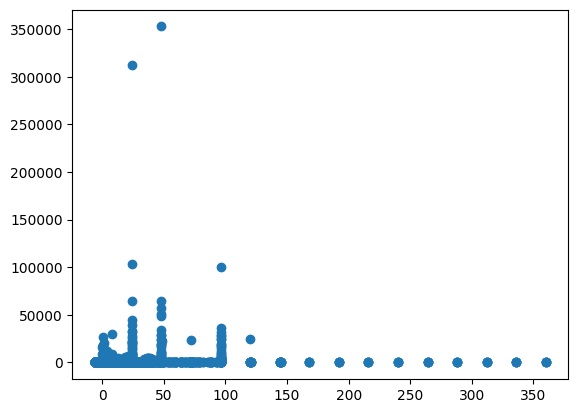

In [127]:
abscisse = df_rat['Time_hr']
ordonné = df_rat['Concentration']
plt.scatter(abscisse, ordonné)

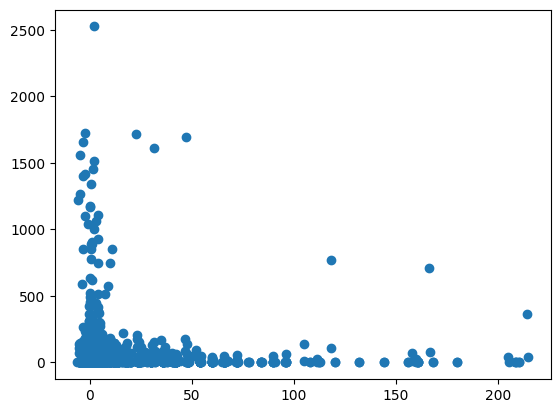

In [128]:
x = df_human['Time_hr']
y = df_human['Concentration']
plt.scatter(x, y)

# Second approach : We create new dataframe based on the chemical and the species

In [129]:
All_datas['Substance_name'].value_counts()

Substance_name
trichloroethylene          1333
benzo(a)pyrene             1298
tert-amyl methyl ether      740
benzene                     390
methyl tert-butyl ether     284
                           ... 
octane                       11
trichloroethene              11
tamoxifen citrate            10
antipyrine                    7
carbendazim                   7
Name: count, Length: 81, dtype: int64

In [130]:
# We take only chemical with more than 50 experiences on it -> len = 46
# We take only chemical with more than 100 experiences on it -> len = 17
condition = All_datas['Substance_name'].value_counts() > 100
dataframes = []
# Filtered values that satisfied the condition 
filtered_values = condition[condition].index

# Create the newest dataframe
enough_datas = All_datas[All_datas['Substance_name'].isin(filtered_values)]

enough_datas['Substance_name'].unique()

array(['1-(1,2,3,4,5,6,7,8-octahydro-2,3,8,8-tetramethyl-2-naphthalenyl)ethanone',
       'phenacetin', 'p-tert-octylphenol', 'trichloroethylene', 'benzene',
       '1,4-dioxane', 'styrene', 'benzo(a)pyrene', 'methanol',
       'tert-amyl methyl ether', 'methyl tert-butyl ether',
       'ethyl tert-butyl ether', 'dichloromethane', 'methyl chloroform',
       'bensulide', 'propyzamide', '1,1-dichloroethylene'], dtype=object)

In [131]:
ethanone = enough_datas[enough_datas['Substance_name'] == '1-(1,2,3,4,5,6,7,8-octahydro-2,3,8,8-tetramethyl-2-naphthalenyl)ethanone' ]

In [132]:
ethanone['Species'].unique()

array(['rat'], dtype=object)

In [133]:
ethanone_rat = ethanone
print(ethanone_rat['Dose_duration'].isna().sum())
ethanone_rat.set_index('Substance_name', inplace=True)

224


In [134]:
ethanone_rat.drop('Dose_duration', axis=1)
ethanone_rat.name = 'ethanone_rat'
dataframes.append(ethanone_rat)

In [135]:
phenacetin = enough_datas[enough_datas['Substance_name'] == 'phenacetin' ]

In [136]:
phenacetin['Species'].unique()

array(['rat', 'dog', 'human'], dtype=object)

In [137]:
print(phenacetin['Species'].str.contains('human').sum())
print(phenacetin['Species'].str.contains('rat').sum())
print(phenacetin['Species'].str.contains('dog').sum())

110
52
7


In [138]:
# Only the rat species satisfy the condition 
phenacetin_rat = phenacetin[phenacetin['Species'] == 'rat']
phenacetin_rat.set_index('Substance_name', inplace=True)
phenacetin_rat.shape

(52, 13)

In [139]:
print(phenacetin_rat['Age_category'].isna().sum())
print(phenacetin_rat['Dose_duration'].isna().sum())

43
52


In [140]:
phenacetin_rat.drop('Dose_duration', axis=1, inplace=True)
phenacetin_rat.name = 'phenacetin_rat'
dataframes.append(phenacetin_rat)
phenacetin_rat

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\928870066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phenacetin_rat.drop('Dose_duration', axis=1, inplace=True)


,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,
phenacetin,DTXSID1021116,62-44-2,rat,male,NaN,0.220,10.0,oral,0.074564,892.703863,plasma,ng/mL
phenacetin,DTXSID1021116,62-44-2,rat,male,NaN,0.220,10.0,oral,0.248994,2909.871245,plasma,ng/mL
phenacetin,DTXSID1021116,62-44-2,rat,male,NaN,0.220,10.0,oral,0.992893,193.133047,plasma,ng/mL
phenacetin,DTXSID1021116,62-44-2,rat,male,NaN,0.220,10.0,oral,1.984894,34.334764,plasma,ng/mL
phenacetin,DTXSID1021116,62-44-2,rat,male,NaN,0.220,10.0,oral,3.990094,12.875536,plasma,ng/mL
phenacetin,DTXSID1021116,62-44-2,rat,male,NaN,0.220,10.0,oral,5.995311,8.583691,plasma,ng/mL
phenacetin,DTXSID1021116,62-44-2,rat,male,NaN,0.220,10.0,oral,7.984868,8.583691,plasma,ng/mL
phenacetin,DTXSID1021116,62-44-2,rat,male,NaN,0.220,360.0,oral,0.111743,14.497717,plasma,ug/mL
phenacetin,DTXSID1021116,62-44-2,rat,male,NaN,0.220,360.0,oral,0.193011,24.315068,plasma,ug/mL


In [141]:
octylphenol = enough_datas[enough_datas['Substance_name'] == 'p-tert-octylphenol' ]

In [142]:
octylphenol['Species'].unique()

array(['rat'], dtype=object)

In [143]:
octylphenol_rat = octylphenol
octylphenol_rat.set_index('Substance_name', inplace=True)
octylphenol_rat

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
p-tert-octylphenol,DTXSID9022360,140-66-9,rat,male,NaN,0.25,NaN,2.0,iv,0.157319,159.126849,blood,ng/mL
p-tert-octylphenol,DTXSID9022360,140-66-9,rat,male,NaN,0.25,NaN,2.0,iv,0.488311,63.567899,blood,ng/mL
p-tert-octylphenol,DTXSID9022360,140-66-9,rat,male,NaN,0.25,NaN,2.0,iv,0.819586,46.638247,blood,ng/mL
p-tert-octylphenol,DTXSID9022360,140-66-9,rat,male,NaN,0.25,NaN,2.0,iv,1.155086,28.808907,blood,ng/mL
p-tert-octylphenol,DTXSID9022360,140-66-9,rat,male,NaN,0.25,NaN,2.0,iv,1.486436,24.818162,blood,ng/mL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
p-tert-octylphenol,DTXSID9022360,140-66-9,rat,female,NaN,0.18,NaN,125.0,NaN,4.068483,116.690447,blood,ng/mL
p-tert-octylphenol,DTXSID9022360,140-66-9,rat,female,NaN,0.18,NaN,125.0,NaN,5.946244,217.863036,blood,ng/mL
p-tert-octylphenol,DTXSID9022360,140-66-9,rat,female,NaN,0.18,NaN,125.0,NaN,7.989691,181.730466,blood,ng/mL


In [144]:
print(octylphenol_rat['Age_category'].isna().sum())
print(octylphenol_rat['Dose_duration'].isna().sum())

107
107


In [145]:
octylphenol_rat.drop(['Age_category','Dose_duration'], axis=1, inplace=True)
octylphenol_rat.name = 'octylphenol_rat'
dataframes.append(octylphenol_rat)
octylphenol_rat

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\1405676603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  octylphenol_rat.drop(['Age_category','Dose_duration'], axis=1, inplace=True)


,Dsstox_substance,Dsstox_CASrn,Species,Sex,Weight_kg,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,
p-tert-octylphenol,DTXSID9022360,140-66-9,rat,male,0.25,2.0,iv,0.157319,159.126849,blood,ng/mL
p-tert-octylphenol,DTXSID9022360,140-66-9,rat,male,0.25,2.0,iv,0.488311,63.567899,blood,ng/mL
p-tert-octylphenol,DTXSID9022360,140-66-9,rat,male,0.25,2.0,iv,0.819586,46.638247,blood,ng/mL
p-tert-octylphenol,DTXSID9022360,140-66-9,rat,male,0.25,2.0,iv,1.155086,28.808907,blood,ng/mL
p-tert-octylphenol,DTXSID9022360,140-66-9,rat,male,0.25,2.0,iv,1.486436,24.818162,blood,ng/mL
...,...,...,...,...,...,...,...,...,...,...,...
p-tert-octylphenol,DTXSID9022360,140-66-9,rat,female,0.18,125.0,NaN,4.068483,116.690447,blood,ng/mL
p-tert-octylphenol,DTXSID9022360,140-66-9,rat,female,0.18,125.0,NaN,5.946244,217.863036,blood,ng/mL
p-tert-octylphenol,DTXSID9022360,140-66-9,rat,female,0.18,125.0,NaN,7.989691,181.730466,blood,ng/mL


In [146]:
trichloroethylene = enough_datas[enough_datas['Substance_name'] == 'trichloroethylene' ]

In [147]:
trichloroethylene['Species'].unique()

array(['rat', 'human', 'mouse', 'dog'], dtype=object)

In [148]:
print(trichloroethylene['Species'].str.contains('human').sum())
print(trichloroethylene['Species'].str.contains('rat').sum())
print(trichloroethylene['Species'].str.contains('mouse').sum())
print(trichloroethylene['Species'].str.contains('dog').sum())

269
697
357
10


In [149]:
# We keep all the species except the dog one
trichloroethylene_human = trichloroethylene[trichloroethylene['Species'] == 'human']
trichloroethylene_rat = trichloroethylene[trichloroethylene['Species'] == 'rat']
trichloroethylene_mouse = trichloroethylene[trichloroethylene['Species'] == 'mouse']
trichloroethylene_human.set_index('Substance_name', inplace=True)
trichloroethylene_rat.set_index('Substance_name', inplace=True)
trichloroethylene_mouse.set_index('Substance_name', inplace=True)

trichloroethylene_rat.name = 'trichloroethylene_rat'

In [150]:
trichloroethylene_human

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
trichloroethylene,DTXSID0021383,79-01-6,human,male,adult,61.6,4 hr,NaN,inhalation,0.00,1.943000,exhaled breath,umol/L
trichloroethylene,DTXSID0021383,79-01-6,human,male,adult,61.6,4 hr,NaN,inhalation,0.17,0.302000,exhaled breath,umol/L
trichloroethylene,DTXSID0021383,79-01-6,human,male,adult,61.6,4 hr,NaN,inhalation,0.50,0.200000,exhaled breath,umol/L
trichloroethylene,DTXSID0021383,79-01-6,human,male,adult,61.6,4 hr,NaN,inhalation,1.00,0.129000,exhaled breath,umol/L
trichloroethylene,DTXSID0021383,79-01-6,human,male,adult,61.6,4 hr,NaN,inhalation,1.50,0.101000,exhaled breath,umol/L
...,...,...,...,...,...,...,...,...,...,...,...,...,...
trichloroethylene,DTXSID0021383,79-01-6,human,male,adult,61.6,6 hr,NaN,inhalation,66.00,51.033484,blood,ug/mL
trichloroethylene,DTXSID0021383,79-01-6,human,male,adult,61.6,6 hr,NaN,inhalation,72.00,55.050917,blood,ug/mL
trichloroethylene,DTXSID0021383,79-01-6,human,male,adult,61.6,6 hr,NaN,inhalation,90.00,49.036358,blood,ug/mL


In [151]:
trichloroethylene_human['Dose_level'].isna().sum()

269

In [152]:
trichloroethylene_human.drop('Dose_level', axis=1, inplace=True)
trichloroethylene_human.name = 'trichloroethylene_human'
dataframes.append(trichloroethylene_human)

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\1878254561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trichloroethylene_human.drop('Dose_level', axis=1, inplace=True)


In [153]:
trichloroethylene_mouse

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
trichloroethylene,DTXSID0021383,79-01-6,mouse,male,adult,0.0275,NaN,2000.0,oral,0.365726,209.537067,blood,ug/mL
trichloroethylene,DTXSID0021383,79-01-6,mouse,male,adult,0.0275,NaN,2000.0,oral,0.585162,161.941369,blood,ug/mL
trichloroethylene,DTXSID0021383,79-01-6,mouse,male,adult,0.0275,NaN,2000.0,oral,1.097179,140.946370,blood,ug/mL
trichloroethylene,DTXSID0021383,79-01-6,mouse,male,adult,0.0275,NaN,2000.0,oral,2.121212,65.057860,blood,ug/mL
trichloroethylene,DTXSID0021383,79-01-6,mouse,male,adult,0.0275,NaN,2000.0,oral,4.096134,48.302454,blood,ug/mL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
trichloroethylene,DTXSID0021383,79-01-6,mouse,male,adult,0.0275,NaN,300.0,oral,7.874367,47.447057,liver,ug/mL
trichloroethylene,DTXSID0021383,79-01-6,mouse,male,adult,0.0275,NaN,300.0,oral,15.877825,35.148214,liver,ug/mL
trichloroethylene,DTXSID0021383,79-01-6,mouse,male,adult,0.0275,NaN,300.0,oral,23.802173,8.057849,liver,ug/mL


In [154]:
trichloroethylene_mouse['Dose_duration'].isna().sum()

357

In [155]:
trichloroethylene_mouse.drop('Dose_duration', axis=1, inplace=True)
trichloroethylene_mouse.name = 'trichloroethylene_mouse'
dataframes.append(trichloroethylene_mouse)

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\605562256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trichloroethylene_mouse.drop('Dose_duration', axis=1, inplace=True)


In [156]:
benzene = enough_datas[enough_datas['Substance_name'] == 'benzene' ]

In [157]:
benzene['Species'].unique()

array(['rat', 'human'], dtype=object)

In [158]:
print(benzene['Species'].str.contains('human').sum())
print(benzene['Species'].str.contains('rat').sum())

274
116


In [159]:
# We keep the 2 species
benzene_human = benzene[benzene['Species'] == 'human']
benzene_rat = benzene[benzene['Species'] == 'rat']
benzene_human.set_index('Substance_name', inplace=True)
benzene_rat.set_index('Substance_name', inplace=True)

benzene_human.name = 'benzene_human'
dataframes.append(benzene_human)

benzene_rat.name = 'benzene_rat'
dataframes.append(benzene_rat)

In [160]:
benzene_human

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
benzene,DTXSID3039242,71-43-2,human,male,adult,72.5,4 hr,30.000000,inhalation,0.392578,492.549653,venous blood,nmol/L
benzene,DTXSID3039242,71-43-2,human,male,adult,72.5,4 hr,30.000000,inhalation,0.655397,1344.013438,venous blood,nmol/L
benzene,DTXSID3039242,71-43-2,human,male,adult,72.5,4 hr,30.000000,inhalation,1.472798,1454.676100,venous blood,nmol/L
benzene,DTXSID3039242,71-43-2,human,male,adult,72.5,4 hr,30.000000,inhalation,1.926953,1513.412659,venous blood,nmol/L
benzene,DTXSID3039242,71-43-2,human,male,adult,72.5,4 hr,30.000000,inhalation,3.933936,745.922826,venous blood,nmol/L
...,...,...,...,...,...,...,...,...,...,...,...,...,...
benzene,DTXSID3039242,71-43-2,human,female,adult,55.4,2 hr,79.867076,inhalation,3.051010,0.178632,expired air,ug/dL
benzene,DTXSID3039242,71-43-2,human,female,adult,55.4,2 hr,79.867076,inhalation,3.550597,0.152340,expired air,ug/dL
benzene,DTXSID3039242,71-43-2,human,female,adult,55.4,2 hr,79.867076,inhalation,4.045161,0.148897,expired air,ug/dL


In [161]:
benzene_rat

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
benzene,DTXSID3039242,71-43-2,rat,male,adolescent,0.4000,6 hr,606.989775,inhalation,0.489779,7.584646,fat,mg/L
benzene,DTXSID3039242,71-43-2,rat,male,adolescent,0.4000,6 hr,606.989775,inhalation,0.989968,19.477974,fat,mg/L
benzene,DTXSID3039242,71-43-2,rat,male,adolescent,0.4000,6 hr,606.989775,inhalation,1.489774,27.539947,fat,mg/L
benzene,DTXSID3039242,71-43-2,rat,male,adolescent,0.4000,6 hr,606.989775,inhalation,1.989485,34.644080,fat,mg/L
benzene,DTXSID3039242,71-43-2,rat,male,adolescent,0.4000,6 hr,606.989775,inhalation,3.992583,105.684453,fat,mg/L
...,...,...,...,...,...,...,...,...,...,...,...,...,...
benzene,DTXSID3039242,71-43-2,rat,female,adult,0.2566,2 hr,3194.683027,inhalation,8.238259,0.993143,blood,ug/dL
benzene,DTXSID3039242,71-43-2,rat,female,adult,0.2566,2 hr,3194.683027,inhalation,9.208537,1.130968,blood,ug/dL
benzene,DTXSID3039242,71-43-2,rat,female,adult,0.2566,2 hr,3194.683027,inhalation,10.214410,1.836195,blood,ug/dL


In [162]:
dioxane = enough_datas[enough_datas['Substance_name'] == '1,4-dioxane' ]

In [163]:
dioxane['Species'].unique()

array(['rat', 'mouse'], dtype=object)

In [164]:
print(dioxane['Species'].str.contains('mouse').sum())
print(dioxane['Species'].str.contains('rat').sum())

24
235


In [165]:
# We keep only the rat species
dioxane_rat = dioxane[dioxane['Species'] == 'rat']
dioxane_rat.set_index('Substance_name', inplace=True)
dioxane_rat

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
"1,4-dioxane",DTXSID4020533,123-91-1,rat,male,NaN,0.2425,NaN,1000.0,iv,1.166738,521.723485,plasma,ug/mL
"1,4-dioxane",DTXSID4020533,123-91-1,rat,male,NaN,0.2425,NaN,1000.0,iv,1.630279,588.895585,plasma,ug/mL
"1,4-dioxane",DTXSID4020533,123-91-1,rat,male,NaN,0.2425,NaN,1000.0,iv,2.724959,503.557146,plasma,ug/mL
"1,4-dioxane",DTXSID4020533,123-91-1,rat,male,NaN,0.2425,NaN,1000.0,iv,3.648588,588.307216,plasma,ug/mL
"1,4-dioxane",DTXSID4020533,123-91-1,rat,male,NaN,0.2425,NaN,1000.0,iv,4.382863,593.212582,plasma,ug/mL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,4-dioxane",DTXSID4020533,123-91-1,rat,male,NaN,0.2425,NaN,10.0,iv,2.232525,2.160360,plasma,ug/mL
"1,4-dioxane",DTXSID4020533,123-91-1,rat,male,NaN,0.2425,NaN,3.0,iv,0.000000,2.298093,plasma,ug/mL
"1,4-dioxane",DTXSID4020533,123-91-1,rat,male,NaN,0.2425,NaN,3.0,iv,0.668434,1.931652,plasma,ug/mL


In [166]:
print(dioxane_rat['Age_category'].isna().sum())
print(dioxane_rat['Dose_duration'].isna().sum())

235
235


In [167]:
dioxane_rat.drop(['Age_category','Dose_duration'], axis=1, inplace=True)

dioxane_rat.name = 'dioxane_rat'
dataframes.append(dioxane_rat)

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\3362259196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dioxane_rat.drop(['Age_category','Dose_duration'], axis=1, inplace=True)


In [168]:
styrene = enough_datas[enough_datas['Substance_name'] == 'styrene']

In [169]:
styrene['Species'].unique()

array(['human', 'rat'], dtype=object)

In [170]:
print(styrene['Species'].str.contains('human').sum())
print(styrene['Species'].str.contains('rat').sum())

128
25


In [171]:
# We keep only the human species
styrene_human = styrene[styrene['Species'] == 'human']
styrene_human.set_index('Substance_name', inplace=True)
styrene_human.name = 'styrene_human'
dataframes.append(styrene_human)
styrene_human

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
styrene,DTXSID2021284,100-42-5,human,male,adult,83.1,6 hr,NaN,inhalation,0.775072,0.428525,blood,ug/mL
styrene,DTXSID2021284,100-42-5,human,male,adult,83.1,6 hr,NaN,inhalation,2.296014,0.742206,blood,ug/mL
styrene,DTXSID2021284,100-42-5,human,male,adult,83.1,6 hr,NaN,inhalation,4.093473,0.759137,blood,ug/mL
styrene,DTXSID2021284,100-42-5,human,male,adult,83.1,6 hr,NaN,inhalation,5.216774,0.776554,blood,ug/mL
styrene,DTXSID2021284,100-42-5,human,male,adult,83.1,6 hr,NaN,inhalation,6.068722,0.904481,blood,ug/mL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
styrene,DTXSID2021284,100-42-5,human,male,adult,83.1,24 hr,NaN,inhalation,8.389062,0.331864,expired breath,ug/mL
styrene,DTXSID2021284,100-42-5,human,male,adult,83.1,24 hr,NaN,inhalation,12.331859,0.327581,expired breath,ug/mL
styrene,DTXSID2021284,100-42-5,human,male,adult,83.1,24 hr,NaN,inhalation,17.547255,0.270955,expired breath,ug/mL


In [172]:
styrene_human['Dose_level'].isna().sum()

128

In [173]:
styrene_human.drop('Dose_level', axis=1, inplace=True)

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\3361820144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  styrene_human.drop('Dose_level', axis=1, inplace=True)


In [174]:
benzopyrene = enough_datas[enough_datas['Substance_name'] == 'benzo(a)pyrene']

In [175]:
benzopyrene['Species'].unique()

array(['rat'], dtype=object)

In [176]:
benzopyrene_rat = benzopyrene
benzopyrene_rat.set_index('Substance_name', inplace=True)
benzopyrene_rat

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
benzo(a)pyrene,DTXSID2020139,50-32-8,rat,female,adult,0.1800,NaN,0.055556,iv,0.042645,8.106351,fat,ng/g
benzo(a)pyrene,DTXSID2020139,50-32-8,rat,female,adult,0.1800,NaN,0.055556,iv,0.206803,13.047053,fat,ng/g
benzo(a)pyrene,DTXSID2020139,50-32-8,rat,female,adult,0.1800,NaN,0.055556,iv,0.702488,21.317025,fat,ng/g
benzo(a)pyrene,DTXSID2020139,50-32-8,rat,female,adult,0.1800,NaN,0.055556,iv,1.943346,14.237596,fat,ng/g
benzo(a)pyrene,DTXSID2020139,50-32-8,rat,female,adult,0.1800,NaN,0.055556,iv,3.924306,17.051976,fat,ng/g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
benzo(a)pyrene,DTXSID2020139,50-32-8,rat,male,NaN,0.3800,NaN,0.002656,oral,3.762705,0.092532,central blood,pmol/mL
benzo(a)pyrene,DTXSID2020139,50-32-8,rat,male,NaN,0.3800,NaN,0.002656,oral,5.694630,0.059045,central blood,pmol/mL
benzo(a)pyrene,DTXSID2020139,50-32-8,rat,male,NaN,0.3800,NaN,0.002656,oral,11.716770,0.046137,central blood,pmol/mL


In [177]:
benzopyrene_rat['Dose_duration'].isna().sum()

benzopyrene_rat.name = 'benzopyrene_rat'
dataframes.append(benzopyrene_rat)

In [178]:
methanol = enough_datas[enough_datas['Substance_name'] == 'methanol']

In [179]:
methanol['Species'].unique()

array(['rat', 'monkey'], dtype=object)

In [180]:
print(methanol['Species'].str.contains('monkey').sum())
print(methanol['Species'].str.contains('rat').sum())

29
82


In [181]:
# Exception here, we keep the rat species to have data on methanol
methanol_rat = methanol[methanol['Species'] == 'rat']
methanol_rat.set_index('Substance_name', inplace=True)
methanol_rat

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
methanol,DTXSID2021731,67-56-1,rat,male,NaN,0.21,6 hr,NaN,inhalation,-5.615406,1.404682,blood,ug/mL
methanol,DTXSID2021731,67-56-1,rat,male,NaN,0.21,6 hr,NaN,inhalation,-3.047470,3.110368,blood,ug/mL
methanol,DTXSID2021731,67-56-1,rat,male,NaN,0.21,6 hr,NaN,inhalation,-0.070001,3.511706,blood,ug/mL
methanol,DTXSID2021731,67-56-1,rat,male,NaN,0.21,6 hr,NaN,inhalation,0.428751,2.408027,blood,ug/mL
methanol,DTXSID2021731,67-56-1,rat,male,NaN,0.21,6 hr,NaN,inhalation,0.927782,2.006689,blood,ug/mL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
methanol,DTXSID2021731,67-56-1,rat,male,NaN,0.21,NaN,100.0,iv,5.980190,17.599613,exhaled air,umol
methanol,DTXSID2021731,67-56-1,rat,male,NaN,0.21,NaN,100.0,iv,8.026128,18.804447,exhaled air,umol
methanol,DTXSID2021731,67-56-1,rat,male,NaN,0.21,NaN,100.0,iv,10.008849,19.446741,exhaled air,umol


In [182]:
methanol_rat['Age_category'].isna().sum()

82

In [183]:
methanol_rat.drop('Age_category', axis=1, inplace=True)

methanol_rat.name = 'methanol_rat'
dataframes.append(methanol_rat)

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\3410667109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  methanol_rat.drop('Age_category', axis=1, inplace=True)


In [184]:
tertamyl = enough_datas[enough_datas['Substance_name'] == 'tert-amyl methyl ether']

In [185]:
tertamyl['Species'].unique()

array(['rat', 'human'], dtype=object)

In [186]:
print(tertamyl['Species'].str.contains('human').sum())
print(tertamyl['Species'].str.contains('rat').sum())

225
515


In [187]:
# We keep both
tertamyl_human = tertamyl[tertamyl['Species'] == 'human']
tertamyl_rat = tertamyl[tertamyl['Species'] == 'rat']
tertamyl_human.set_index('Substance_name', inplace=True)
tertamyl_rat.set_index('Substance_name', inplace=True)
tertamyl_human

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
tert-amyl methyl ether,DTXSID8024521,994-05-8,human,NaN,adult,74.5,4 hr,NaN,inhalation,0.000000,0.588724,blood,uM
tert-amyl methyl ether,DTXSID8024521,994-05-8,human,NaN,adult,74.5,4 hr,NaN,inhalation,2.021596,0.208250,blood,uM
tert-amyl methyl ether,DTXSID8024521,994-05-8,human,NaN,adult,74.5,4 hr,NaN,inhalation,4.008119,0.138546,blood,uM
tert-amyl methyl ether,DTXSID8024521,994-05-8,human,NaN,adult,74.5,4 hr,NaN,inhalation,6.019972,0.110726,blood,uM
tert-amyl methyl ether,DTXSID8024521,994-05-8,human,NaN,adult,74.5,4 hr,NaN,inhalation,10.013964,0.084958,blood,uM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
tert-amyl methyl ether,DTXSID8024521,994-05-8,human,male,adult,70.0,4 hr,NaN,inhalation,0.650867,17.030038,blood,umol/L
tert-amyl methyl ether,DTXSID8024521,994-05-8,human,male,adult,70.0,4 hr,NaN,inhalation,1.158098,15.974374,blood,umol/L
tert-amyl methyl ether,DTXSID8024521,994-05-8,human,male,adult,70.0,4 hr,NaN,inhalation,2.412769,13.428504,blood,umol/L


In [188]:
tertamyl_human['Dose_level'].isna().sum()

tertamyl_human.name = 'tertamyl_human'
dataframes.append(tertamyl_human)

In [189]:
tertamyl_rat

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
tert-amyl methyl ether,DTXSID8024521,994-05-8,rat,male,adolescent,0.2767,6 hr,NaN,inhalation,-5.888225,24.945623,blood,ug/mL
tert-amyl methyl ether,DTXSID8024521,994-05-8,rat,male,adolescent,0.2767,6 hr,NaN,inhalation,-5.886882,22.355666,blood,ug/mL
tert-amyl methyl ether,DTXSID8024521,994-05-8,rat,male,adolescent,0.2767,6 hr,NaN,inhalation,-5.885652,19.981539,blood,ug/mL
tert-amyl methyl ether,DTXSID8024521,994-05-8,rat,male,adolescent,0.2767,6 hr,NaN,inhalation,-5.884197,17.175752,blood,ug/mL
tert-amyl methyl ether,DTXSID8024521,994-05-8,rat,male,adolescent,0.2767,6 hr,NaN,inhalation,-5.882743,14.369965,blood,ug/mL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
tert-amyl methyl ether,DTXSID8024521,994-05-8,rat,NaN,young_adult,0.2150,4 hr,NaN,inhalation,23.948608,0.189067,urine,umol
tert-amyl methyl ether,DTXSID8024521,994-05-8,rat,NaN,young_adult,0.2150,4 hr,NaN,inhalation,29.961456,0.122892,urine,umol
tert-amyl methyl ether,DTXSID8024521,994-05-8,rat,NaN,young_adult,0.2150,4 hr,NaN,inhalation,36.025696,0.174374,urine,umol


In [190]:
tertamyl_rat['Dose_level'].isna().sum()

515

In [191]:
tertamyl_rat['Sex'].isna().sum()
tertamyl_rat.dropna(subset = ['Sex'],inplace= True)

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\619286089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tertamyl_rat.dropna(subset = ['Sex'],inplace= True)


In [192]:
tertamyl_rat['Dose_level'].fillna(-1000, inplace= True)
print(tertamyl_rat.count())

tertamyl_rat.name = 'tertamyl_rat'
dataframes.append(tertamyl_rat)

Dsstox_substance        458
Dsstox_CASrn            458
Species                 458
Sex                     458
Age_category            458
Weight_kg               458
Dose_duration           458
Dose_level              458
Administration_route    458
Time_hr                 458
Concentration           458
Conc_medium             458
Conc_units              458
dtype: int64


C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\401807316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tertamyl_rat['Dose_level'].fillna(-1000, inplace= True)


In [193]:
tertamyl_rat

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
tert-amyl methyl ether,DTXSID8024521,994-05-8,rat,male,adolescent,0.2767,6 hr,-1000.0,inhalation,-5.888225,24.945623,blood,ug/mL
tert-amyl methyl ether,DTXSID8024521,994-05-8,rat,male,adolescent,0.2767,6 hr,-1000.0,inhalation,-5.886882,22.355666,blood,ug/mL
tert-amyl methyl ether,DTXSID8024521,994-05-8,rat,male,adolescent,0.2767,6 hr,-1000.0,inhalation,-5.885652,19.981539,blood,ug/mL
tert-amyl methyl ether,DTXSID8024521,994-05-8,rat,male,adolescent,0.2767,6 hr,-1000.0,inhalation,-5.884197,17.175752,blood,ug/mL
tert-amyl methyl ether,DTXSID8024521,994-05-8,rat,male,adolescent,0.2767,6 hr,-1000.0,inhalation,-5.882743,14.369965,blood,ug/mL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
tert-amyl methyl ether,DTXSID8024521,994-05-8,rat,female,adolescent,0.1750,6 hr,-1000.0,inhalation,3.965789,0.525304,blood,ug/mL
tert-amyl methyl ether,DTXSID8024521,994-05-8,rat,female,adolescent,0.1750,6 hr,-1000.0,inhalation,3.968198,0.349752,blood,ug/mL
tert-amyl methyl ether,DTXSID8024521,994-05-8,rat,female,adolescent,0.1750,6 hr,-1000.0,inhalation,3.969448,0.258726,blood,ug/mL


In [194]:
tert_butyl = enough_datas[enough_datas['Substance_name'] == 'methyl tert-butyl ether']

In [195]:
tert_butyl['Species'].unique()

array(['human', 'rat'], dtype=object)

In [196]:
print(tert_butyl['Species'].str.contains('human').sum())
print(tert_butyl['Species'].str.contains('rat').sum())

257
27


In [197]:
# We keep only human species
tert_butyl_human = tert_butyl[tert_butyl['Species'] == 'human']
tert_butyl_human.set_index('Substance_name', inplace=True)
tert_butyl_human

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
methyl tert-butyl ether,DTXSID3020833,1634-04-4,human,NaN,adult,74.5,4 hr,NaN,inhalation,0.006146,1.934134,blood,uM
methyl tert-butyl ether,DTXSID3020833,1634-04-4,human,NaN,adult,74.5,4 hr,NaN,inhalation,1.999930,0.642848,blood,uM
methyl tert-butyl ether,DTXSID3020833,1634-04-4,human,NaN,adult,74.5,4 hr,NaN,inhalation,3.940149,0.353711,blood,uM
methyl tert-butyl ether,DTXSID3020833,1634-04-4,human,NaN,adult,74.5,4 hr,NaN,inhalation,6.009987,0.173997,blood,uM
methyl tert-butyl ether,DTXSID3020833,1634-04-4,human,NaN,adult,74.5,4 hr,NaN,inhalation,7.950695,0.084009,blood,uM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
methyl tert-butyl ether,DTXSID3020833,1634-04-4,human,male,adult,74.5,4 hr,NaN,inhalation,0.795966,31.975588,blood,umol/L
methyl tert-butyl ether,DTXSID3020833,1634-04-4,human,male,adult,74.5,4 hr,NaN,inhalation,1.226359,30.552717,blood,umol/L
methyl tert-butyl ether,DTXSID3020833,1634-04-4,human,male,adult,74.5,4 hr,NaN,inhalation,2.492001,37.922162,blood,umol/L


In [198]:
tert_butyl_human['Dose_level'].isna().sum()

tert_butyl_human.name = 'tert_butyl_human'
dataframes.append(tert_butyl_human)

In [199]:
ethyl_tert_butyl = enough_datas[enough_datas['Substance_name'] == 'ethyl tert-butyl ether']

In [200]:
ethyl_tert_butyl['Species'].unique()

array(['human', 'rat'], dtype=object)

In [201]:
print(ethyl_tert_butyl['Species'].str.contains('human').sum())
print(ethyl_tert_butyl['Species'].str.contains('rat').sum())

92
25


In [202]:
# Exception here, we keep human species
ethyl_tert_butyl_human = ethyl_tert_butyl[ethyl_tert_butyl['Species'] == 'human']
ethyl_tert_butyl_human.set_index('Substance_name', inplace=True)
ethyl_tert_butyl_human

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
ethyl tert-butyl ether,DTXSID0025604,637-92-3,human,NaN,adult,74.5,4 hr,NaN,inhalation,0.017045,1.316914,blood,uM
ethyl tert-butyl ether,DTXSID0025604,637-92-3,human,NaN,adult,74.5,4 hr,NaN,inhalation,2.045455,0.371301,blood,uM
ethyl tert-butyl ether,DTXSID0025604,637-92-3,human,NaN,adult,74.5,4 hr,NaN,inhalation,4.022727,0.117174,blood,uM
ethyl tert-butyl ether,DTXSID0025604,637-92-3,human,NaN,adult,74.5,4 hr,NaN,inhalation,0.017045,1.869526,blood,uM
ethyl tert-butyl ether,DTXSID0025604,637-92-3,human,NaN,adult,74.5,4 hr,NaN,inhalation,2.045455,1.687852,blood,uM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ethyl tert-butyl ether,DTXSID0025604,637-92-3,human,NaN,adult,74.5,4 hr,NaN,inhalation,48.105263,3.187251,urine,umol
ethyl tert-butyl ether,DTXSID0025604,637-92-3,human,NaN,adult,74.5,4 hr,NaN,inhalation,54.052632,2.390438,urine,umol
ethyl tert-butyl ether,DTXSID0025604,637-92-3,human,NaN,adult,74.5,4 hr,NaN,inhalation,60.157895,2.191235,urine,umol


In [203]:
print(ethyl_tert_butyl_human['Sex'].isna().sum())
print(ethyl_tert_butyl_human['Dose_level'].isna().sum())

92
92


In [204]:
ethyl_tert_butyl_human.drop(['Dose_level'], axis=1, inplace=True)
ethyl_tert_butyl_human['Sex'].fillna('male',inplace=True)

ethyl_tert_butyl_human.name = 'ethyl_tert_butyl_human'
dataframes.append(ethyl_tert_butyl_human)

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\3616122138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ethyl_tert_butyl_human.drop(['Dose_level'], axis=1, inplace=True)
C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\3616122138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ethyl_tert_butyl_human['Sex'].fillna('male',inplace=True)


In [205]:
dichlo = enough_datas[enough_datas['Substance_name'] == 'dichloromethane']

In [206]:
dichlo['Species'].unique()

array(['mouse'], dtype=object)

In [207]:
dichlo_mouse = dichlo
dichlo_mouse.set_index('Substance_name', inplace=True)
dichlo_mouse

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
dichloromethane,DTXSID0020868,75-09-2,mouse,male,NaN,0.0225,NaN,10.0,iv,0.333333,3.450000,liver,ug/g
dichloromethane,DTXSID0020868,75-09-2,mouse,male,NaN,0.0225,NaN,10.0,iv,0.666667,3.570000,liver,ug/g
dichloromethane,DTXSID0020868,75-09-2,mouse,male,NaN,0.0225,NaN,10.0,iv,1.000000,4.110000,liver,ug/g
dichloromethane,DTXSID0020868,75-09-2,mouse,male,NaN,0.0225,NaN,10.0,iv,3.000000,2.560000,liver,ug/g
dichloromethane,DTXSID0020868,75-09-2,mouse,male,NaN,0.0225,NaN,10.0,iv,4.000000,1.290000,liver,ug/g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
dichloromethane,DTXSID0020868,75-09-2,mouse,male,NaN,0.0225,NaN,50.0,iv,0.344346,0.856551,liver,mg/kg
dichloromethane,DTXSID0020868,75-09-2,mouse,male,NaN,0.0225,NaN,50.0,iv,0.680284,0.637180,liver,mg/kg
dichloromethane,DTXSID0020868,75-09-2,mouse,male,NaN,0.0225,NaN,50.0,iv,1.016508,0.615948,liver,mg/kg


In [208]:
print(dichlo_mouse['Age_category'].isna().sum())
print(dichlo_mouse['Dose_duration'].isna().sum())

148
148


In [209]:
dichlo_mouse.drop(['Age_category','Dose_duration'], axis=1, inplace=True)

dichlo_mouse.name = 'dichlo_mouse'
dataframes.append(dichlo_mouse)

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\3967277964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dichlo_mouse.drop(['Age_category','Dose_duration'], axis=1, inplace=True)


In [210]:
chloroform = enough_datas[enough_datas['Substance_name'] == 'methyl chloroform']

In [211]:
chloroform['Species'].unique()

array(['human'], dtype=object)

In [212]:
chloroform_human = chloroform
chloroform_human.set_index('Substance_name', inplace=True)
chloroform_human

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
methyl chloroform,DTXSID0021381,71-55-6,human,male,adult,85.0,6 hr,NaN,inhalation,2.900329,38.903298,blood,ug/L
methyl chloroform,DTXSID0021381,71-55-6,human,male,adult,85.0,6 hr,NaN,inhalation,4.033394,43.742717,blood,ug/L
methyl chloroform,DTXSID0021381,71-55-6,human,male,adult,85.0,6 hr,NaN,inhalation,5.958783,65.473399,blood,ug/L
methyl chloroform,DTXSID0021381,71-55-6,human,male,adult,85.0,6 hr,NaN,inhalation,7.365131,89.109250,blood,ug/L
methyl chloroform,DTXSID0021381,71-55-6,human,male,adult,85.0,6 hr,NaN,inhalation,8.961881,105.291135,blood,ug/L
...,...,...,...,...,...,...,...,...,...,...,...,...,...
methyl chloroform,DTXSID0021381,71-55-6,human,male,adult,85.0,6 hr,NaN,inhalation,22.988920,23.232304,urine,ug/hr
methyl chloroform,DTXSID0021381,71-55-6,human,male,adult,85.0,6 hr,NaN,inhalation,34.809847,27.885572,urine,ug/hr
methyl chloroform,DTXSID0021381,71-55-6,human,male,adult,85.0,6 hr,NaN,inhalation,104.917455,14.121056,urine,ug/hr


In [213]:
chloroform_human['Dose_level'].isna().sum()

147

In [214]:
chloroform_human.drop('Dose_level', axis=1, inplace=True)

chloroform_human.name = 'chloroform_human'
dataframes.append(chloroform_human)

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\3678782690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chloroform_human.drop('Dose_level', axis=1, inplace=True)


In [215]:
bensulide = enough_datas[enough_datas['Substance_name'] == 'bensulide']

In [216]:
bensulide['Species'].unique()

array(['rat'], dtype=object)

In [217]:
bensulide_rat = bensulide
bensulide_rat.set_index('Substance_name', inplace=True)
bensulide_rat

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
bensulide,DTXSID9032329,741-58-2,rat,male,adult,0.33969,NaN,5.18,oral,0.25,0.007835,Plasma,ug/mL
bensulide,DTXSID9032329,741-58-2,rat,male,adult,0.33969,NaN,5.18,oral,0.50,0.007825,Plasma,ug/mL
bensulide,DTXSID9032329,741-58-2,rat,male,adult,0.33969,NaN,5.18,oral,1.00,0.005200,Plasma,ug/mL
bensulide,DTXSID9032329,741-58-2,rat,male,adult,0.33969,NaN,5.18,oral,2.00,0.002090,Plasma,ug/mL
bensulide,DTXSID9032329,741-58-2,rat,male,adult,0.33969,NaN,5.18,oral,4.00,0.000648,Plasma,ug/mL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
bensulide,DTXSID9032329,741-58-2,rat,male,adult,0.35000,NaN,1.00,iv,8.00,NaN,Plasma,ug/mL
bensulide,DTXSID9032329,741-58-2,rat,male,adult,0.35000,NaN,1.00,iv,12.00,NaN,Plasma,ug/mL
bensulide,DTXSID9032329,741-58-2,rat,male,adult,0.35000,NaN,1.00,iv,24.00,NaN,Plasma,ug/mL


In [218]:
bensulide_rat['Concentration'].dropna(inplace=True)
bensulide_rat['Dose_duration'].isna().sum()

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\368682948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bensulide_rat['Concentration'].dropna(inplace=True)


150

In [219]:
bensulide_rat.drop('Dose_duration', axis=1, inplace=True)

bensulide_rat.name = 'bensulide_rat'
dataframes.append(bensulide_rat)

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\688948739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bensulide_rat.drop('Dose_duration', axis=1, inplace=True)


In [220]:
propyzamide = enough_datas[enough_datas['Substance_name'] == 'propyzamide']

In [221]:
propyzamide['Species'].unique()

array(['rat'], dtype=object)

In [222]:
propyzamide_rat = propyzamide
propyzamide_rat.set_index('Substance_name', inplace=True)
propyzamide_rat

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
propyzamide,DTXSID2020420,23950-58-5,rat,male,adult,0.34378,NaN,0.608,iv,0.0833,0.05335,Plasma,ug/mL
propyzamide,DTXSID2020420,23950-58-5,rat,male,adult,0.34378,NaN,0.608,iv,0.1670,0.03465,Plasma,ug/mL
propyzamide,DTXSID2020420,23950-58-5,rat,male,adult,0.34378,NaN,0.608,iv,0.5000,0.02015,Plasma,ug/mL
propyzamide,DTXSID2020420,23950-58-5,rat,male,adult,0.34378,NaN,0.608,iv,1.0000,0.01345,Plasma,ug/mL
propyzamide,DTXSID2020420,23950-58-5,rat,male,adult,0.34378,NaN,0.608,iv,2.0000,0.01950,Plasma,ug/mL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
propyzamide,DTXSID2020420,23950-58-5,rat,male,adult,0.35000,NaN,0.600,iv,8.0000,NaN,Plasma,ug/mL
propyzamide,DTXSID2020420,23950-58-5,rat,male,adult,0.35000,NaN,0.600,iv,12.0000,0.00060,Plasma,ug/mL
propyzamide,DTXSID2020420,23950-58-5,rat,male,adult,0.35000,NaN,0.600,iv,24.0000,NaN,Plasma,ug/mL


In [223]:
propyzamide_rat['Concentration'].dropna(inplace=True)
propyzamide_rat['Dose_duration'].isna().sum()

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\4284199197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propyzamide_rat['Concentration'].dropna(inplace=True)


139

In [224]:
propyzamide_rat.drop('Dose_duration', axis=1, inplace=True)

propyzamide_rat.name = 'propyzamide_rat'
dataframes.append(propyzamide_rat)

C:\Users\tomal\AppData\Local\Temp\ipykernel_9164\642937970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propyzamide_rat.drop('Dose_duration', axis=1, inplace=True)


In [225]:
dichloroethylene = enough_datas[enough_datas['Substance_name'] == '1,1-dichloroethylene']

In [226]:
dichloroethylene['Species'].unique()

array(['rat'], dtype=object)

In [227]:
dichloroethylene_rat = dichloroethylene
dichloroethylene_rat.set_index('Substance_name', inplace=True)
dichloroethylene_rat.name = 'dichloroethylene_rat'
print(dichloroethylene_rat.name)


dichloroethylene_rat.name = 'dichloroethylene_rat'
dataframes.append(dichloroethylene_rat)

dichloroethylene_rat

dichloroethylene_rat


,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Dose_level,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,,
"1,1-dichloroethylene",DTXSID8021438,75-35-4,rat,male,adult,0.4,3 hr,99.120654,inhalation,-2.925500,13.331555,exhaled breath,ppm
"1,1-dichloroethylene",DTXSID8021438,75-35-4,rat,male,adult,0.4,3 hr,99.120654,inhalation,-2.857647,12.418998,exhaled breath,ppm
"1,1-dichloroethylene",DTXSID8021438,75-35-4,rat,male,adult,0.4,3 hr,99.120654,inhalation,-2.794075,14.668675,exhaled breath,ppm
"1,1-dichloroethylene",DTXSID8021438,75-35-4,rat,male,adult,0.4,3 hr,99.120654,inhalation,-2.726340,15.021877,exhaled breath,ppm
"1,1-dichloroethylene",DTXSID8021438,75-35-4,rat,male,adult,0.4,3 hr,99.120654,inhalation,-2.650751,16.645162,exhaled breath,ppm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,1-dichloroethylene",DTXSID8021438,75-35-4,rat,male,adult,0.4,3 hr,1189.447853,inhalation,0.204395,1.739521,venous blood,ug/mL
"1,1-dichloroethylene",DTXSID8021438,75-35-4,rat,male,adult,0.4,3 hr,1189.447853,inhalation,0.275664,1.354513,venous blood,ug/mL
"1,1-dichloroethylene",DTXSID8021438,75-35-4,rat,male,adult,0.4,3 hr,1189.447853,inhalation,0.335217,1.060149,venous blood,ug/mL


### Visualisation part

In [228]:
# We can only use numeric columns for correlation analysis
numeric_df = dfConc_time_values.select_dtypes(include=[float, int])
numeric_df

,fk_series_id,time_original,conc_original,conc_sd_original,conc_lower_bound_original,conc_upper_bound_original,time_hr,conc,conc_sd,conc_lower_bound,conc_upper_bound
id,,,,,,,,,,,
1,1,0.069826,2.618893,NaN,NaN,NaN,0.06982,0.00261,NaN,NaN,NaN
2,1,0.239928,122.156713,NaN,NaN,NaN,0.23992,0.12215,NaN,NaN,NaN
3,1,0.407653,340.571116,47.781570,NaN,NaN,0.40765,0.34057,NaN,NaN,NaN
4,1,0.766816,990.431853,76.792296,NaN,NaN,0.76681,0.99043,NaN,NaN,NaN
5,1,1.066636,510.409394,54.607509,NaN,NaN,1.06663,0.51040,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
123077,32410,2.232525,2.160360,NaN,NaN,NaN,2.23252,2.16035,NaN,NaN,NaN
123078,32411,0.000000,2.298093,NaN,NaN,NaN,0.00000,2.29809,NaN,NaN,NaN
123079,32411,0.668434,1.931652,NaN,NaN,NaN,0.66843,1.93165,NaN,NaN,NaN


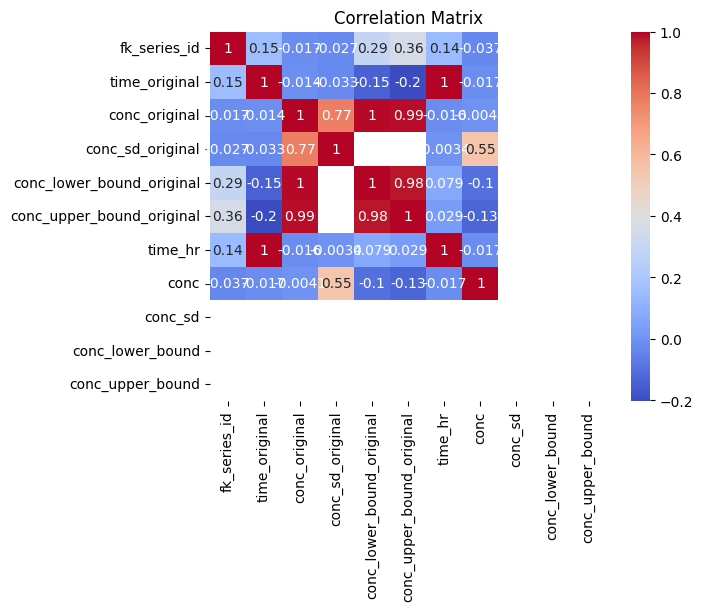

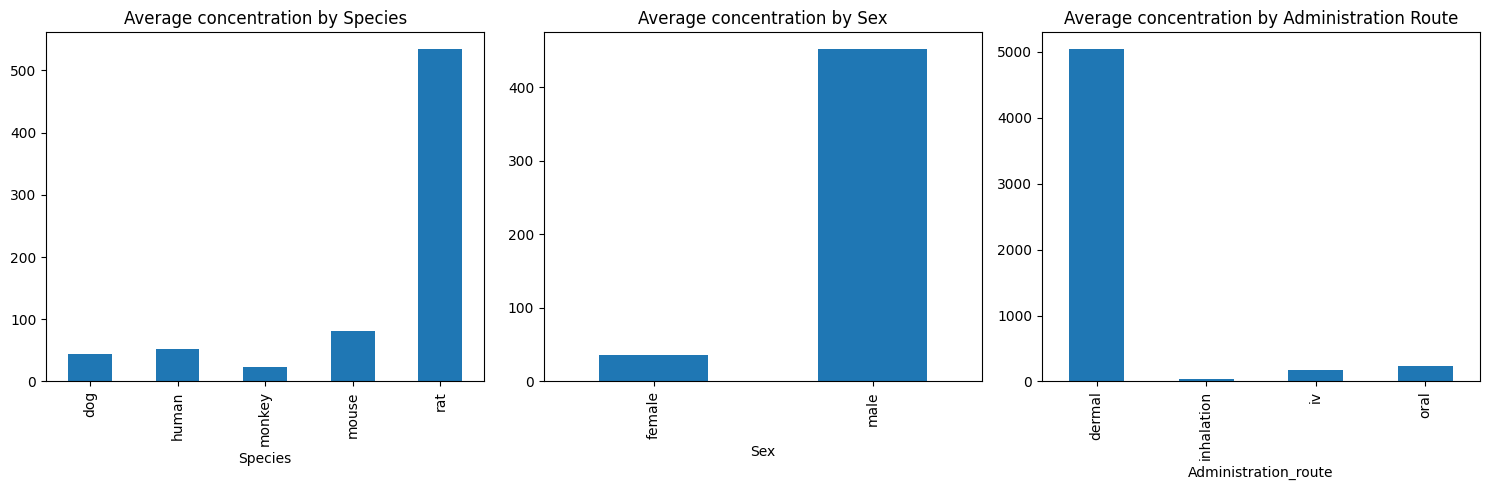

In [229]:
# Correlation analysis among attributes
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

species_behavior = All_datas.groupby('Species')['Concentration'].mean()
sex_behavior = All_datas.groupby('Sex')['Concentration'].mean()
admin_route_behavior = All_datas.groupby('Administration_route')['Concentration'].mean()


# Plotting the behaviors
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
species_behavior.plot(kind='bar', title='Average concentration by Species')
plt.subplot(1, 3, 2)
sex_behavior.plot(kind='bar', title='Average concentration by Sex')
plt.subplot(1, 3, 3)
admin_route_behavior.plot(kind='bar', title='Average concentration by Administration Route')
plt.tight_layout()
plt.show()


### Machine learning part

#### Approach 2

In [230]:
def process_and_train(data_frames):
    results = []
    
    for df in data_frames:
        # Determine categorical features based on the name of the dataframe

        if df.name.endswith('_human'):
            categorical_features = ['Sex', 'Administration_route']
            required_columns = ['Time_hr', 'Species', 'Sex', 'Administration_route', 'Concentration']
        else:
            categorical_features = ['Sex', 'Dose_level', 'Administration_route']
            required_columns = ['Time_hr', 'Dose_level', 'Species', 'Sex', 'Administration_route', 'Concentration']
        

        # Ensure the required columns are present
        temp = df[required_columns].dropna()

        if df.name.endswith('_human'):
            X = temp[['Time_hr', 'Species', 'Sex', 'Administration_route']]
        else:
            X = temp[['Time_hr', 'Dose_level', 'Species', 'Sex', 'Administration_route']]
        y = temp['Concentration']
        

        # OneHotEncode categorical features
        encoder = OneHotEncoder()
        encoded_categorical = encoder.fit_transform(temp[categorical_features]).toarray()
        encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))
        
        # Combine the encoded categorical features with the numeric features
        if df.name.endswith('_human'):
            numeric_features = ['Time_hr']
        else:
            numeric_features = ['Time_hr', 'Dose_level']
        
        final_df = pd.concat([temp[numeric_features].reset_index(drop=True), encoded_categorical_df], axis=1)
        
        # Scale numeric features
        scaler = StandardScaler()
        final_df[numeric_features] = scaler.fit_transform(final_df[numeric_features])
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(final_df, y, test_size=0.2, random_state=42)
        
        # Initialize models
        lr_model = LinearRegression()
        gb_model = GradientBoostingRegressor(random_state=42)
        rf_model = RandomForestRegressor(random_state=42)
        
        # Train models
        lr_model.fit(X_train, y_train)
        gb_model.fit(X_train, y_train)
        rf_model.fit(X_train, y_train)
        
        # Make predictions
        lr_pred = lr_model.predict(X_test)
        gb_pred = gb_model.predict(X_test)
        rf_pred = rf_model.predict(X_test)
        
        # Evaluate models
        def evaluate_model(y_test, predictions):
            mse = mean_squared_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)
            return mse, r2

        lr_mse, lr_r2 = evaluate_model(y_test, lr_pred)
        gb_mse, gb_r2 = evaluate_model(y_test, gb_pred)
        rf_mse, rf_r2 = evaluate_model(y_test, rf_pred)
        
        # Store the results
        results.append({
            'dataframe_name': df.name,
            'Linear Regression': {'MSE': lr_mse, 'R2': lr_r2},
            'Gradient Boosting': {'MSE': gb_mse, 'R2': gb_r2},
            'Random Forest': {'MSE': rf_mse, 'R2': rf_r2}
        })
    
    return results

In [231]:
print(len(dataframes))



20


In [232]:
for i in dataframes:
    print(i.name)

ethanone_rat
phenacetin_rat
octylphenol_rat
trichloroethylene_human
trichloroethylene_mouse
benzene_human
benzene_rat
dioxane_rat
styrene_human
benzopyrene_rat
methanol_rat
tertamyl_human
tertamyl_rat
tert_butyl_human
ethyl_tert_butyl_human
dichlo_mouse
chloroform_human
bensulide_rat
propyzamide_rat
dichloroethylene_rat


In [233]:
dataframes[14]

,Dsstox_substance,Dsstox_CASrn,Species,Sex,Age_category,Weight_kg,Dose_duration,Administration_route,Time_hr,Concentration,Conc_medium,Conc_units
Substance_name,,,,,,,,,,,,
ethyl tert-butyl ether,DTXSID0025604,637-92-3,human,male,adult,74.5,4 hr,inhalation,0.017045,1.316914,blood,uM
ethyl tert-butyl ether,DTXSID0025604,637-92-3,human,male,adult,74.5,4 hr,inhalation,2.045455,0.371301,blood,uM
ethyl tert-butyl ether,DTXSID0025604,637-92-3,human,male,adult,74.5,4 hr,inhalation,4.022727,0.117174,blood,uM
ethyl tert-butyl ether,DTXSID0025604,637-92-3,human,male,adult,74.5,4 hr,inhalation,0.017045,1.869526,blood,uM
ethyl tert-butyl ether,DTXSID0025604,637-92-3,human,male,adult,74.5,4 hr,inhalation,2.045455,1.687852,blood,uM
...,...,...,...,...,...,...,...,...,...,...,...,...
ethyl tert-butyl ether,DTXSID0025604,637-92-3,human,male,adult,74.5,4 hr,inhalation,48.105263,3.187251,urine,umol
ethyl tert-butyl ether,DTXSID0025604,637-92-3,human,male,adult,74.5,4 hr,inhalation,54.052632,2.390438,urine,umol
ethyl tert-butyl ether,DTXSID0025604,637-92-3,human,male,adult,74.5,4 hr,inhalation,60.157895,2.191235,urine,umol


In [234]:
del dataframes[12]
process_and_train(dataframes)

[{'dataframe_name': 'ethanone_rat',
  'Linear Regression': {'MSE': 155033519.3948566, 'R2': 0.10392556228620631},
  'Gradient Boosting': {'MSE': 181645177.3661879, 'R2': -0.04988650717058496},
  'Random Forest': {'MSE': 172900919.489161, 'R2': 0.0006542145453746206}},
 {'dataframe_name': 'phenacetin_rat',
  'Linear Regression': {'MSE': 18802.69960439028, 'R2': 0.8215571453664018},
  'Gradient Boosting': {'MSE': 685701.2535219847, 'R2': -5.507495821277167},
  'Random Forest': {'MSE': 229233.0856663556, 'R2': -1.1754858101983219}},
 {'dataframe_name': 'octylphenol_rat',
  'Linear Regression': {'MSE': 8254.520185418589, 'R2': 0.34057670607190915},
  'Gradient Boosting': {'MSE': 19870.918665352412, 'R2': -0.587414694657918},
  'Random Forest': {'MSE': 16559.520166081136, 'R2': -0.3228792332563817}},
 {'dataframe_name': 'trichloroethylene_human',
  'Linear Regression': {'MSE': 156.92157688423634, 'R2': 0.050051337877213165},
  'Gradient Boosting': {'MSE': 159.7212894839801, 'R2': 0.03310285

##### Tuning + cross validation

In [235]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

def train_and_evaluate_modelsTC(data_frames):
    results = []
    
    for df in data_frames:
        # Determine categorical features based on the name of the dataframe
        
        if df.name.endswith('_human'):
            categorical_features = ['Sex', 'Administration_route']
            required_columns = ['Time_hr', 'Species', 'Sex', 'Administration_route', 'Concentration']
        else:
            categorical_features = ['Sex', 'Dose_level', 'Administration_route']
            required_columns = ['Time_hr', 'Dose_level', 'Species', 'Sex', 'Administration_route', 'Concentration']
        
        # Ensure the required columns are present
        temp = df[required_columns].dropna()

        # Select features for X
        if df.name.endswith('_human'):
            X = temp[['Time_hr', 'Species', 'Sex', 'Administration_route']]
        else:
            X = temp[['Time_hr', 'Dose_level', 'Species', 'Sex', 'Administration_route']]
        
        y = temp['Concentration']

        # One-hot encode categorical features
        encoder = OneHotEncoder()
        encoded_categorical = encoder.fit_transform(temp[categorical_features]).toarray()
        encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))
        
        # Combine encoded categorical features with numeric features
        if df.name.endswith('_human'):
            numeric_features = ['Time_hr']
        else:
            numeric_features = ['Time_hr', 'Dose_level']
        
        final_df = pd.concat([temp[numeric_features].reset_index(drop=True), encoded_categorical_df], axis=1)
        
        # Scale numeric features
        scaler = StandardScaler()
        final_df[numeric_features] = scaler.fit_transform(final_df[numeric_features])
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(final_df, y, test_size=0.2, random_state=42)
        
        # Initialize models with GridSearchCV or RandomizedSearchCV for tuning
        lr_model = LinearRegression()
        
        # Parameter grid for Gradient Boosting
        gb_param_grid = {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.05, 0.1, 0.15],
            'max_depth': [3, 5, 7]
        }
        
        gb_model = GradientBoostingRegressor(random_state=42)
        gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
        
        # Parameter grid for Random Forest
        rf_param_grid = {
            'n_estimators': [50, 100, 150],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [None, 10, 20, 30]
        }
        
        rf_model = RandomForestRegressor(random_state=42)
        rf_grid_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_grid, scoring='neg_mean_squared_error', cv=5, n_iter=10, random_state=42, verbose=1)
        
        # Define the list of models and their names
        models = [
            ('Linear Regression', lr_model),
            ('Gradient Boosting', gb_grid_search),
            ('Random Forest', rf_grid_search)
        ]
        
        # Initialize a dictionary to store results for each model
        model_results = {}

        for model_name, model in models:
            if isinstance(model, GridSearchCV) or isinstance(model, RandomizedSearchCV):
                model.fit(X_train, y_train)  # Fit GridSearchCV or RandomizedSearchCV
                best_model = model.best_estimator_  # Get best estimator
            else:
                model.fit(X_train, y_train)  # Fit model directly
                best_model = model  # Best model is itself if not tuned

            # Make predictions on the test data
            y_pred = best_model.predict(X_test)
            
            # Evaluate the model
            mse, r2 = evaluate_model(y_test, y_pred)
            
            # Perform cross-validation
            cv_scores = cross_val_score(best_model, final_df, y, cv=5, scoring='neg_mean_squared_error')
            cv_mse = -cv_scores.mean()  # Take the mean of MSE scores (negated)
            cv_r2 = cross_val_score(best_model, final_df, y, cv=5, scoring='r2').mean()  # Mean R2 score
            
            # Store the cross-validated results
            model_results[model_name] = {'CV_MSE': cv_mse, 'CV_R2': cv_r2}

            # Store the results including best parameters
            results.append({
                'dataframe_name': df.name,
                'model_name': model_name,
                'MSE': mse,
                'R2': r2,
                'CV_MSE': cv_mse,
                'CV_R2': cv_r2,
                'Best_Params': best_model.get_params() if isinstance(model, GridSearchCV) or isinstance(model, RandomizedSearchCV) else None
            })
    
    return results

In [236]:
train_and_evaluate_modelsTC(dataframes)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds 

[{'dataframe_name': 'ethanone_rat',
  'model_name': 'Linear Regression',
  'MSE': 155033519.3948566,
  'R2': 0.10392556228620631,
  'CV_MSE': 1134684787.3800168,
  'CV_R2': -1.308695746196039,
  'Best_Params': None},
 {'dataframe_name': 'ethanone_rat',
  'model_name': 'Gradient Boosting',
  'MSE': 165890398.43216103,
  'R2': 0.04117415332217811,
  'CV_MSE': 1124862439.8383625,
  'CV_R2': -1.0603419359874986,
  'Best_Params': {'alpha': 0.9,
   'ccp_alpha': 0.0,
   'criterion': 'friedman_mse',
   'init': None,
   'learning_rate': 0.05,
   'loss': 'squared_error',
   'max_depth': 3,
   'max_features': None,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.0,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'min_weight_fraction_leaf': 0.0,
   'n_estimators': 50,
   'n_iter_no_change': None,
   'random_state': 42,
   'subsample': 1.0,
   'tol': 0.0001,
   'validation_fraction': 0.1,
   'verbose': 0,
   'warm_start': False}},
 {'dataframe_name': 'ethanone_rat',
  'model_name':

In [237]:
def process_and_trainC(data_frames):
    results = []
    
    for df in data_frames:
        
        # Determine categorical features based on the name of the dataframe
        if df.name.endswith('_human'):
            categorical_features = ['Sex', 'Administration_route']
            required_columns = ['Time_hr', 'Species', 'Sex', 'Administration_route', 'Concentration']
        else:
            categorical_features = ['Sex', 'Dose_level', 'Administration_route']
            required_columns = ['Time_hr', 'Dose_level', 'Species', 'Sex', 'Administration_route', 'Concentration']
        

        # Ensure the required columns are present
        temp = df[required_columns].dropna()

        # Select features for X
        if df.name.endswith('_human'):
            X = temp[['Time_hr', 'Species', 'Sex', 'Administration_route']]
        else:
            X = temp[['Time_hr', 'Dose_level', 'Species', 'Sex', 'Administration_route']]
        
        y = temp['Concentration']

        # One-hot encode categorical features
        encoder = OneHotEncoder()
        encoded_categorical = encoder.fit_transform(temp[categorical_features]).toarray()
        encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))
        
        # Combine encoded categorical features with numeric features
        if df.name.endswith('_human'):
            numeric_features = ['Time_hr']
        else:
            numeric_features = ['Time_hr', 'Dose_level']
        
        final_df = pd.concat([temp[numeric_features].reset_index(drop=True), encoded_categorical_df], axis=1)
        
        # Scale numeric features
        scaler = StandardScaler()
        final_df[numeric_features] = scaler.fit_transform(final_df[numeric_features])
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(final_df, y, test_size=0.2, random_state=42)
        
        # Initialize models
        lr_model = LinearRegression()
        gb_model = GradientBoostingRegressor(random_state=42)
        rf_model = RandomForestRegressor(random_state=42)
        
        # Define the list of models and their names
        models = [
            ('Linear Regression', lr_model),
            ('Gradient Boosting', gb_model),
            ('Random Forest', rf_model)
        ]
        
        # Initialize a dictionary to store results for each model
        model_results = {}

        for model_name, model in models:
            # Perform cross-validation
            cv_scores = cross_val_score(model, final_df, y, cv=5, scoring='neg_mean_squared_error')
            cv_mse = -cv_scores.mean()  # Take the mean of MSE scores (negated)
            cv_r2 = cross_val_score(model, final_df, y, cv=5, scoring='r2').mean()  # Mean R2 score
            
            # Store the cross-validated results
            model_results[model_name] = {'CV_MSE': cv_mse, 'CV_R2': cv_r2}

            # Train the model on the training data
            model.fit(X_train, y_train)
            
            # Make predictions on the test data
            y_pred = model.predict(X_test)
            
            # Evaluate the model
            mse, r2 = evaluate_model(y_test, y_pred)
            
            # Store the results
            results.append({
                'dataframe_name': df.name,
                'model_name': model_name,
                'MSE': mse,
                'R2': r2,
                'CV_MSE': cv_mse,
                'CV_R2': cv_r2
            })
    
    return results

In [238]:
process_and_trainC(dataframes)

[{'dataframe_name': 'ethanone_rat',
  'model_name': 'Linear Regression',
  'MSE': 155033519.3948566,
  'R2': 0.10392556228620631,
  'CV_MSE': 1134684787.3800168,
  'CV_R2': -1.308695746196039},
 {'dataframe_name': 'ethanone_rat',
  'model_name': 'Gradient Boosting',
  'MSE': 181645177.3661879,
  'R2': -0.04988650717058496,
  'CV_MSE': 1132165485.5723732,
  'CV_R2': -1.2622969517133498},
 {'dataframe_name': 'ethanone_rat',
  'model_name': 'Random Forest',
  'MSE': 172900919.489161,
  'R2': 0.0006542145453746206,
  'CV_MSE': 1135453983.3076463,
  'CV_R2': -1.2698365389864854},
 {'dataframe_name': 'phenacetin_rat',
  'model_name': 'Linear Regression',
  'MSE': 18802.69960439028,
  'R2': 0.8215571453664018,
  'CV_MSE': 374148.5816339253,
  'CV_R2': -840.300385893157},
 {'dataframe_name': 'phenacetin_rat',
  'model_name': 'Gradient Boosting',
  'MSE': 685701.2535219847,
  'R2': -5.507495821277167,
  'CV_MSE': 702439.3394645735,
  'CV_R2': -4622.1142394832505},
 {'dataframe_name': 'phenaceti

#### Approach 1

In [239]:
temp = styrene_human[['Time_hr', 'Species', 'Sex', 'Administration_route', 'Concentration']].dropna()
temp.info()

# Prepare the dataset
X = temp[['Time_hr', 'Species', 'Sex', 'Administration_route']]
y = temp['Concentration']

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, styrene to styrene
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time_hr               128 non-null    float64
 1   Species               128 non-null    object 
 2   Sex                   128 non-null    object 
 3   Administration_route  128 non-null    object 
 4   Concentration         128 non-null    float64
dtypes: float64(2), object(3)
memory usage: 10.1+ KB


In [240]:
categorical_features = ['Sex', 'Administration_route']
numeric_features = ['Time_hr']

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical features
encoded_categorical = encoder.fit_transform(temp[categorical_features]).toarray()

# Create a DataFrame with the encoded categorical features
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Combine the encoded categorical features with the numeric features
final_df = pd.concat([temp[numeric_features].reset_index(drop=True),encoded_categorical_df ], axis=1)

# Display the final DataFrame
final_df

,Time_hr,Sex_male,Administration_route_inhalation
0,0.775072,1.0,1.0
1,2.296014,1.0,1.0
2,4.093473,1.0,1.0
3,5.216774,1.0,1.0
4,6.068722,1.0,1.0
...,...,...,...
123,8.389062,1.0,1.0
124,12.331859,1.0,1.0
125,17.547255,1.0,1.0
126,24.602437,1.0,1.0


In [241]:
X = final_df
y = temp['Concentration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lr_model = LinearRegression()
gb_model = GradientBoostingRegressor()
rf_model = RandomForestRegressor()

# Train models
lr_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(y_test, predictions):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

lr_mse, lr_r2 = evaluate_model(y_test, lr_pred)
gb_mse, gb_r2 = evaluate_model(y_test, gb_pred)
rf_mse, rf_r2 = evaluate_model(y_test, rf_pred)

# Display evaluation results
print(f"Linear Regression: MSE = {lr_mse}, R2 = {lr_r2}")
print(f"Gradient Boosting: MSE = {gb_mse}, R2 = {gb_r2}")
print(f"Random Forest: MSE = {rf_mse}, R2 = {rf_r2}")


Linear Regression: MSE = 42.81950072626992, R2 = 0.04108270131381864
Gradient Boosting: MSE = 16.391540038388108, R2 = 0.6329211917860038
Random Forest: MSE = 20.368297921057675, R2 = 0.5438640598321285


In [242]:
temp = dichloroethylene_rat[['Time_hr', 'Dose_level', 'Species', 'Sex', 'Administration_route', 'Concentration']].dropna()
temp.info()

# Prepare the dataset
X = temp[['Time_hr', 'Dose_level', 'Species', 'Sex', 'Administration_route']]
y = temp['Concentration']

<class 'pandas.core.frame.DataFrame'>
Index: 231 entries, 1,1-dichloroethylene to 1,1-dichloroethylene
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time_hr               231 non-null    float64
 1   Dose_level            231 non-null    float64
 2   Species               231 non-null    object 
 3   Sex                   231 non-null    object 
 4   Administration_route  231 non-null    object 
 5   Concentration         231 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.7+ KB


In [243]:
categorical_features = ['Sex', 'Administration_route']
numeric_features = ['Time_hr', 'Dose_level']

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical features
encoded_categorical = encoder.fit_transform(temp[categorical_features]).toarray()

# Create a DataFrame with the encoded categorical features
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Combine the encoded categorical features with the numeric features
final_df = pd.concat([temp[numeric_features].reset_index(drop=True),encoded_categorical_df ], axis=1)

# Display the final DataFrame
final_df

,Time_hr,Dose_level,Sex_male,Administration_route_inhalation
0,-2.925500,99.120654,1.0,1.0
1,-2.857647,99.120654,1.0,1.0
2,-2.794075,99.120654,1.0,1.0
3,-2.726340,99.120654,1.0,1.0
4,-2.650751,99.120654,1.0,1.0
...,...,...,...,...
226,0.204395,1189.447853,1.0,1.0
227,0.275664,1189.447853,1.0,1.0
228,0.335217,1189.447853,1.0,1.0
229,0.398435,1189.447853,1.0,1.0


In [244]:
X = final_df
y = temp['Concentration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lr_model = LinearRegression()
gb_model = GradientBoostingRegressor()
rf_model = RandomForestRegressor()

# Train models
lr_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(y_test, predictions):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

lr_mse, lr_r2 = evaluate_model(y_test, lr_pred)
gb_mse, gb_r2 = evaluate_model(y_test, gb_pred)
rf_mse, rf_r2 = evaluate_model(y_test, rf_pred)

# Display evaluation results
print(f"Linear Regression: MSE = {lr_mse}, R2 = {lr_r2}")
print(f"Gradient Boosting: MSE = {gb_mse}, R2 = {gb_r2}")
print(f"Random Forest: MSE = {rf_mse}, R2 = {rf_r2}")


Linear Regression: MSE = 5495.576940674666, R2 = 0.38421878837840295
Gradient Boosting: MSE = 6448.848146521635, R2 = 0.27740443485788546
Random Forest: MSE = 7384.616178497679, R2 = 0.1725513177516358


#### Not applicable

In [245]:
All_datas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8995 entries, 1 to 123081
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Substance_name        8995 non-null   object 
 1   Dsstox_substance      8995 non-null   object 
 2   Dsstox_CASrn          8995 non-null   object 
 3   Species               8995 non-null   object 
 4   Sex                   8277 non-null   object 
 5   Age_category          5937 non-null   object 
 6   Weight_kg             8995 non-null   float64
 7   Dose_duration         3817 non-null   object 
 8   Dose_level            6367 non-null   float64
 9   Administration_route  8971 non-null   object 
 10  Time_hr               8995 non-null   float64
 11  Concentration         8199 non-null   float64
 12  Conc_medium           8995 non-null   object 
 13  Conc_units            8995 non-null   object 
dtypes: float64(4), object(10)
memory usage: 1.3+ MB


In [246]:
# Handle missing values
temp = All_datas[['Time_hr', 'Dose_level', 'Species', 'Sex', 'Administration_route', 'Concentration']].dropna()
print(temp.info())

print("")

# Prepare the dataset
X = temp[['Time_hr', 'Dose_level', 'Species', 'Sex', 'Administration_route']]
y = temp['Concentration']

print(X.info())

print("")

print(y.count())

<class 'pandas.core.frame.DataFrame'>
Index: 5226 entries, 25 to 123081
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time_hr               5226 non-null   float64
 1   Dose_level            5226 non-null   float64
 2   Species               5226 non-null   object 
 3   Sex                   5226 non-null   object 
 4   Administration_route  5226 non-null   object 
 5   Concentration         5226 non-null   float64
dtypes: float64(3), object(3)
memory usage: 285.8+ KB
None

<class 'pandas.core.frame.DataFrame'>
Index: 5226 entries, 25 to 123081
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time_hr               5226 non-null   float64
 1   Dose_level            5226 non-null   float64
 2   Species               5226 non-null   object 
 3   Sex                   5226 non-null   object 
 4   Administratio

In [247]:
#Check for numbers of rows
print(X.info())
print("")
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5226 entries, 25 to 123081
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time_hr               5226 non-null   float64
 1   Dose_level            5226 non-null   float64
 2   Species               5226 non-null   object 
 3   Sex                   5226 non-null   object 
 4   Administration_route  5226 non-null   object 
dtypes: float64(2), object(3)
memory usage: 245.0+ KB
None

<class 'pandas.core.series.Series'>
Index: 5226 entries, 25 to 123081
Series name: Concentration
Non-Null Count  Dtype  
--------------  -----  
5226 non-null   float64
dtypes: float64(1)
memory usage: 81.7 KB
None


In [248]:
categorical_features = ['Sex', 'Administration_route']
numeric_features = ['Time_hr', 'Dose_level']

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical features
encoded_categorical = encoder.fit_transform(temp[categorical_features]).toarray()

# Create a DataFrame with the encoded categorical features
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Combine the encoded categorical features with the numeric features
final_df = pd.concat([temp[numeric_features].reset_index(drop=True),encoded_categorical_df ], axis=1)

# Display the final DataFrame
final_df

,Time_hr,Dose_level,Sex_female,Sex_male,Administration_route_dermal,Administration_route_inhalation,Administration_route_iv,Administration_route_oral
0,4.000000,20.0,0.0,1.0,0.0,0.0,0.0,1.0
1,8.000000,20.0,0.0,1.0,0.0,0.0,0.0,1.0
2,24.000000,20.0,0.0,1.0,0.0,0.0,0.0,1.0
3,48.000000,20.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4.000000,20.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
5221,2.232525,10.0,0.0,1.0,0.0,0.0,1.0,0.0
5222,0.000000,3.0,0.0,1.0,0.0,0.0,1.0,0.0
5223,0.668434,3.0,0.0,1.0,0.0,0.0,1.0,0.0
5224,1.120579,3.0,0.0,1.0,0.0,0.0,1.0,0.0


In [249]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5226 entries, 25 to 123081
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time_hr               5226 non-null   float64
 1   Dose_level            5226 non-null   float64
 2   Species               5226 non-null   object 
 3   Sex                   5226 non-null   object 
 4   Administration_route  5226 non-null   object 
dtypes: float64(2), object(3)
memory usage: 245.0+ KB


In [250]:
X['Species'].unique()

array(['rat', 'dog', 'human', 'mouse'], dtype=object)

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression  # Import the desired model (can be replaced with other models)

def train_and_evaluate_per_species(X, y, model, test_size=0.2, random_state=42):
    species_columns = [col for col in X.columns if col.startswith('Species_')]
    species_list = [col.split('_')[1] for col in species_columns]
    
    results = {}
    
    for species in species_list:
        # Filter data for the current species
        X_species = X[X[f'Species_{species.lower()}'] == 1].drop(columns=species_columns).values
        y_species = y[X[f'Species_{species.lower()}'] == 1].values
        
        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_species, y_species, test_size=test_size, random_state=random_state)
        
        # Initialize and train the model
        model_instance = model
        model_instance.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model_instance.predict(X_test)
        
        # Calculate MSE
        mse = mean_squared_error(y_test, y_pred)
        
        # Store results
        results[species] = {
            'model': model_instance,
            'y_test': y_test,
            'y_pred': y_pred,
            'mse': mse
        }
        
        # Print MSE for each species-specific model
        print(f'{species.capitalize()} Species {type(model).__name__} MSE: {mse}')
    
    return results

# Example usage:
# Assuming final_df contains the combined features (including encoded species) and y contains the target variable

# Define the model (e.g., Linear Regression)
model = LinearRegression()

# Call the function to train and evaluate for each species
results = train_and_evaluate_per_species(final_df, y, model)


In [252]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(final_df, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)

# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

# Hyperparameter tuning using GridSearchCV for Random Forest (example)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
best_rf_pred = best_rf.predict(X_test)
best_rf_mse = mean_squared_error(y_test, best_rf_pred)

# Print MSE for each model
print(f'Linear Regression MSE: {lr_mse}')
print(f'Gradient Boosting MSE: {gb_mse}')
print(f'Random Forest MSE: {rf_mse}')
print(f'Best Random Forest MSE: {best_rf_mse}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Linear Regression MSE: 22692558.620884117
Gradient Boosting MSE: 16406159.036934743
Random Forest MSE: 17778332.682186045
Best Random Forest MSE: 16194923.047940213


In [253]:
def plot_predicted_vs_actual(y_test, y_pred, model_name):
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label=f'{model_name} Predictions')
    plt.plot(y_test, y_test, color='red', label='Ideal: Predicted = Actual')
    plt.title(f'{model_name}: Predicted vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()


In [254]:
def process_and_trainCVIZ(data_frames):
    results = []
    
    for df in data_frames:
        
        # Determine categorical features based on the name of the dataframe
        categorical_features = ['Sex', 'Administration_route']
        required_columns = ['Time_hr', 'Species', 'Sex', 'Administration_route', 'Concentration']
        

        # Select features for X
        X = temp[['Time_hr', 'Species', 'Sex', 'Administration_route']]
        
        y = temp['Concentration']

        # One-hot encode categorical features
        encoder = OneHotEncoder()
        encoded_categorical = encoder.fit_transform(temp[categorical_features]).toarray()
        encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))
        
        # Combine encoded categorical features with numeric features
        numeric_features = ['Time_hr']
        
        final_df = pd.concat([temp[numeric_features].reset_index(drop=True), encoded_categorical_df], axis=1)
        
        # Scale numeric features
        scaler = StandardScaler()
        final_df[numeric_features] = scaler.fit_transform(final_df[numeric_features])
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(final_df, y, test_size=0.2, random_state=42)
        
        # Initialize models
        gb_model = GradientBoostingRegressor(random_state=42)
        
        # Define the list of models and their names
        models = [
            ('Gradient Boosting', gb_model)
        ]
        
        # Initialize a dictionary to store results for each model
        model_results = {}

        for model_name, model in models:
            # Perform cross-validation
            cv_scores = cross_val_score(model, final_df, y, cv=5, scoring='neg_mean_squared_error')
            cv_mse = -cv_scores.mean()  # Take the mean of MSE scores (negated)
            cv_r2 = cross_val_score(model, final_df, y, cv=5, scoring='r2').mean()  # Mean R2 score
            
            # Store the cross-validated results
            model_results[model_name] = {'CV_MSE': cv_mse, 'CV_R2': cv_r2}

            # Train the model on the training data
            model.fit(X_train, y_train)
            
            # Make predictions on the test data
            y_pred = model.predict(X_test)
            
            # Evaluate the model
            mse, r2 = evaluate_model(y_test, y_pred)
            
            # Store the results
            results.append({
                'dataframe_name': df,
                'model_name': model_name,
                'MSE': mse,
                'R2': r2,
                'CV_MSE': cv_mse,
                'CV_R2': cv_r2
            })
    
    return y_pred, y_test

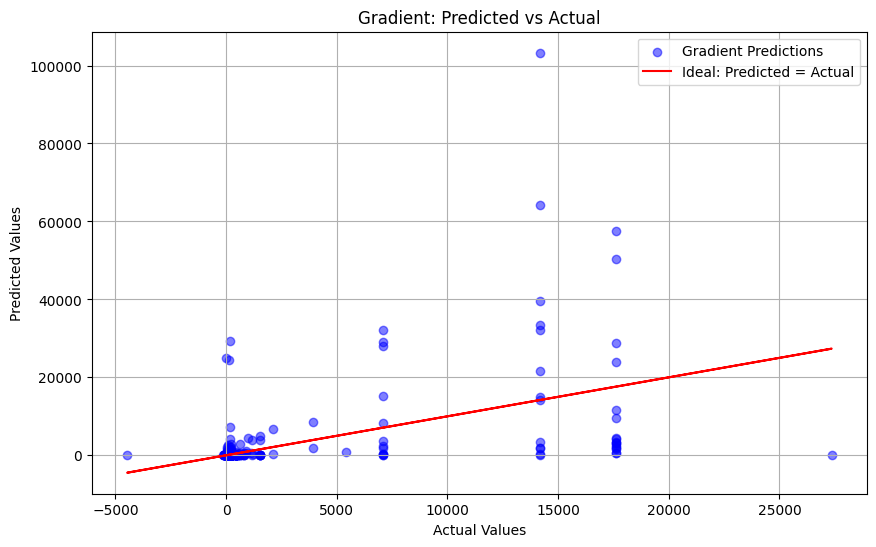

In [255]:
y_pred, y_test = process_and_trainCVIZ(styrene_human)

plot_predicted_vs_actual(y_pred, y_test, "Gradient")